# Overview

In this notebook, I conduct the design and development of artificial intelligence models. The main goal of it is to try to predict the physical exercise adherence of the users based on how much time they have been exercising. 

**Author**: Jon Maestre Escobar

**Email**: jonmaestre@opendeusto.es.

In [1]:
import pandas as pd
import numpy as np
import warnings
import pandas as pd
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import time
from utilities import Data_cleaning

from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.express.colors import sample_colorscale

import math
import copy
import re
%matplotlib inline

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
df_filtered_merged = pd.read_hdf('../data/filtered_merged_dataset_v1.h5', key='df')
df_filtered_merged.fillna(0, inplace=True)
df_filtered_merged.shape

(46020, 8705)

## **Users Filtered by Different Training Periods**

In this section, I have undertaken a detailed process to filter and analyze users based on the duration of their training periods recorded in our dataset. My objective was to categorize users into different groups based on their training consistency and ensure comprehensive data analysis by focusing on the range of days from the first to the last recorded training session.

**Steps Taken**

- **Initial Filtering**:
    - **30 Days or Less**: I first identified users whose training period spans 30 days or less from their first recorded training session to their last.
    - **31 to 90 Days**: Next, I filtered users whose training period spans more than 30 days but not exceeding 90 days.
    - **91 to 180 Days**: Similarly, I filtered users whose training period spans more than 90 days but up to 180 days.
    - **181 to 365 Days**: Finally, I identified users whose training period spans more than 180 days but not exceeding 365 days.

- **Data Completion**:
    - For each of these groups, I ensured that the training records were complete. Specifically, I filled in any missing days with zeros from the user's first recorded training day to ensure there are no gaps in the data.
    - This involved generating a complete date range for each user based on their first training session and merging it with the existing records, filling in the missing entries.

- **Detailed Analysis**:
    - The filtered and completed datasets were then analyzed to understand user behavior and training patterns better. This step helps in identifying trends and making data-driven recommendations for improving user engagement and training adherence.

By implementing these steps, I aim to provide a robust analysis framework that accurately reflects users' training habits, allowing us to draw meaningful insights and support the development of personalized fitness interventions. This comprehensive approach ensures that our analysis accounts for all training days, even those that were not initially recorded, providing a more accurate picture of user activity.

In [3]:
# Convert 'date' to datetime
df_filtered_merged['date'] = pd.to_datetime(df_filtered_merged['date'])

# Calculate the first and last training day for each user
user_training_period = df_filtered_merged.groupby('user_programs_user_id')['date'].agg(['min', 'max']).reset_index()
user_training_period.columns = ['user_programs_user_id', 'first_training_date', 'last_training_date']

# Calculate the difference in days between the first and last training session
user_training_period['training_period_days'] = (user_training_period['last_training_date'] - user_training_period['first_training_date']).dt.days

# Filter users whose training period is 30 days or less
users_30_days_or_less = user_training_period[user_training_period['training_period_days'] <= 30]

# Create a DataFrame with the filtered users
df_filtered_30days = df_filtered_merged[df_filtered_merged['user_programs_user_id'].isin(users_30_days_or_less['user_programs_user_id'])]
df_filtered_30days.shape

(4596, 8705)

In [4]:
# Convert 'date' to datetime
df_filtered_merged['date'] = pd.to_datetime(df_filtered_merged['date'])

# Calculate the first and last training day for each user
user_training_period = df_filtered_merged.groupby('user_programs_user_id')['date'].agg(['min', 'max']).reset_index()
user_training_period.columns = ['user_programs_user_id', 'first_training_date', 'last_training_date']

# Calculate the difference in days between the first and last training session
user_training_period['training_period_days'] = (user_training_period['last_training_date'] - user_training_period['first_training_date']).dt.days

# Filter users whose training period is between 30 and 90 days
users_30_to_90_days = user_training_period[(user_training_period['training_period_days'] > 30) & (user_training_period['training_period_days'] <= 90)]

# Create a DataFrame with the filtered users
df_filtered_30_to_90_days = df_filtered_merged[df_filtered_merged['user_programs_user_id'].isin(users_30_to_90_days['user_programs_user_id'])]
df_filtered_30_to_90_days.shape

(7006, 8705)

In [5]:
# Convert 'date' to datetime
df_filtered_merged['date'] = pd.to_datetime(df_filtered_merged['date'])

# Calculate the first and last training day for each user
user_training_period = df_filtered_merged.groupby('user_programs_user_id')['date'].agg(['min', 'max']).reset_index()
user_training_period.columns = ['user_programs_user_id', 'first_training_date', 'last_training_date']

# Calculate the difference in days between the first and last training session
user_training_period['training_period_days'] = (user_training_period['last_training_date'] - user_training_period['first_training_date']).dt.days

# Filter users whose training period is between 90 and 180 days
users_90_to_180_days = user_training_period[(user_training_period['training_period_days'] > 90) & (user_training_period['training_period_days'] <= 180)]

# Create a DataFrame with the filtered users
df_filtered_90_to_180_days = df_filtered_merged[df_filtered_merged['user_programs_user_id'].isin(users_90_to_180_days['user_programs_user_id'])]
df_filtered_90_to_180_days.shape

(13243, 8705)

In [6]:
# Convert 'date' to datetime
df_filtered_merged['date'] = pd.to_datetime(df_filtered_merged['date'])

# Calculate the first and last training day for each user
user_training_period = df_filtered_merged.groupby('user_programs_user_id')['date'].agg(['min', 'max']).reset_index()
user_training_period.columns = ['user_programs_user_id', 'first_training_date', 'last_training_date']

# Calculate the difference in days between the first and last training session
user_training_period['training_period_days'] = (user_training_period['last_training_date'] - user_training_period['first_training_date']).dt.days

# Filter users whose training period is between 180 and 365 days
users_180_to_365_days = user_training_period[(user_training_period['training_period_days'] > 180) & (user_training_period['training_period_days'] <= 365)]

# Create a DataFrame with the filtered users
df_filtered_180_to_365_days = df_filtered_merged[df_filtered_merged['user_programs_user_id'].isin(users_180_to_365_days['user_programs_user_id'])]
df_filtered_180_to_365_days.shape

(21175, 8705)

In [7]:
print(f'The number of user who have trained 30 days or less is:', df_filtered_30days.user_programs_user_id.nunique()) 
print(f'The number of user who have trained between 31 and 90 days is:', df_filtered_30_to_90_days.user_programs_user_id.nunique())
print(f'The number of user who have trained between 91 and 180 days is', df_filtered_90_to_180_days.user_programs_user_id.nunique())
print(f'The number of user who have trained between 181 and 365 days is', df_filtered_180_to_365_days.user_programs_user_id.nunique())

The number of user who have trained 30 days or less is: 1658
The number of user who have trained between 31 and 90 days is: 549
The number of user who have trained between 91 and 180 days is 572
The number of user who have trained between 181 and 365 days is 409


### **Complete With Zeros Non-Training Days**

In this part of the analysis, I focused on ensuring that each user's training record is complete by filling in non-training days with zeros. This step is crucial for accurate time series analysis and to avoid any misinterpretation of the user's training consistency. Here are the detailed steps I followed:

- **Identify First and Last Training Day**:
    - For each user in the filtered datasets, I identified the first and last day they recorded a training session. This serves as the basis for generating a complete date range for each user.

- **Generate Complete Date Ranges**:
    - Using the first training day as the starting point, I generated a complete date range for each user up to the specified number of days (30 days for users with up to 30 days of training, 90 days for users with training periods of 31-90 days, 180 days for users with training periods of 91-180 days, and 365 days for users with training periods of 181-365 days).

- **Merge with Original Data and Fill Missing Days**:
    - I merged these generated date ranges with the original user training data to identify days that were not recorded.
    - For the missing days, I filled in the relevant columns with zeros, ensuring that there are no gaps in the training data.

- **Combine Completed Data**:
    - The completed data for each user was then combined into a single DataFrame. This new DataFrame includes all the original training data as well as the newly added rows for the non-training days filled with zeros.

This process ensures that each user has a continuous record of training activity, allowing for more accurate analysis and modeling. By filling in the non-training days with zeros, I can better understand user behavior and training patterns, which is essential for developing effective AI models and making informed recommendations.

In [12]:
# Ensure that 'date' is in datetime format
df_filtered_30days['date'] = pd.to_datetime(df_filtered_30days['date'])

# Get the first training day for each user
first_training_day = df_filtered_30days.groupby('user_programs_user_id')['date'].min().reset_index()
first_training_day.columns = ['user_programs_user_id', 'first_training_date']

# Create an empty DataFrame to store the completed data
completed_data_30days = pd.DataFrame()

# Iterate over each user and complete the missing days
for user_id, first_day in zip(first_training_day['user_programs_user_id'], first_training_day['first_training_date']):
    # Generate a date range from the first day up to 30 days later
    date_range = pd.date_range(start=first_day, periods=30)
    
    # Create a DataFrame with the date range and user_id
    user_dates = pd.DataFrame({'user_programs_user_id': user_id, 'date': date_range})
    
    # Merge with the original DataFrame to identify the days with and without training
    user_data = pd.merge(user_dates, df_filtered_30days[df_filtered_30days['user_programs_user_id'] == user_id], on=['user_programs_user_id', 'date'], how='left')
    
    # Fill NaN values (days without training) with zeros in the relevant columns
    user_data.fillna(0, inplace=True)
    
    # Add the completed data to the final DataFrame
    completed_data_30days = pd.concat([completed_data_30days, user_data])

# Reset the index of the final DataFrame
completed_data_30days.reset_index(drop=True, inplace=True)
completed_data_30days.head()

,user_programs_user_id,date,session_executions_updated_at,1 leg bridge (left)_reps_1,1 leg bridge (left)_reps_10,1 leg bridge (left)_reps_11,1 leg bridge (left)_reps_12,1 leg bridge (left)_reps_13,1 leg bridge (left)_reps_14,1 leg bridge (left)_reps_15,1 leg bridge (left)_reps_16,1 leg bridge (left)_reps_17,1 leg bridge (left)_reps_2,1 leg bridge (left)_reps_3,1 leg bridge (left)_reps_4,1 leg bridge (left)_reps_5,1 leg bridge (left)_reps_6,1 leg bridge (left)_reps_7,1 leg bridge (left)_reps_8,1 leg bridge (left)_reps_9,1 leg bridge (left)_time_1,1 leg bridge (left)_time_10,1 leg bridge (left)_time_11,1 leg bridge (left)_time_12,1 leg bridge (left)_time_13,1 leg bridge (left)_time_14,1 leg bridge (left)_time_15,1 leg bridge (left)_time_16,1 leg bridge (left)_time_17,1 leg bridge (left)_time_2,1 leg bridge (left)_time_3,1 leg bridge (left)_time_4,1 leg bridge (left)_time_5,1 leg bridge (left)_time_6,1 leg bridge (left)_time_7,1 leg bridge (left)_time_8,1 leg bridge (left)_time_9,1 leg bridge (right)_reps_1,1 leg bridge (right)_reps_10,1 leg bridge (right)_reps_11,1 leg bridge (right)_reps_12,1 leg bridge (right)_reps_13,1 leg bridge (right)_reps_14,1 leg bridge (right)_reps_15,1 leg bridge (right)_reps_16,1 leg bridge (right)_reps_17,1 leg bridge (right)_reps_2,1 leg bridge (right)_reps_3,1 leg bridge (right)_reps_4,1 leg bridge (right)_reps_5,1 leg bridge (right)_reps_6,1 leg bridge (right)_reps_7,1 leg bridge (right)_reps_8,1 leg bridge (right)_reps_9,1 leg bridge (right)_time_1,1 leg bridge (right)_time_10,1 leg bridge (right)_time_11,1 leg bridge (right)_time_12,1 leg bridge (right)_time_13,1 leg bridge (right)_time_14,1 leg bridge (right)_time_15,1 leg bridge (right)_time_16,1 leg bridge (right)_time_17,1 leg bridge (right)_time_2,1 leg bridge (right)_time_3,1 leg bridge (right)_time_4,1 leg bridge (right)_time_5,1 leg bridge (right)_time_6,1 leg bridge (right)_time_7,1 leg bridge (right)_time_8,1 leg bridge (right)_time_9,1 leg dead lift (left)_reps_1,1 leg dead lift (left)_reps_10,1 leg dead lift (left)_reps_11,1 leg dead lift (left)_reps_12,1 leg dead lift (left)_reps_13,1 leg dead lift (left)_reps_14,1 leg dead lift (left)_reps_15,1 leg dead lift (left)_reps_2,1 leg dead lift (left)_reps_3,1 leg dead lift (left)_reps_4,1 leg dead lift (left)_reps_5,1 leg dead lift (left)_reps_6,1 leg dead lift (left)_reps_7,1 leg dead lift (left)_reps_8,1 leg dead lift (left)_reps_9,1 leg dead lift (left)_time_1,1 leg dead lift (left)_time_10,1 leg dead lift (left)_time_11,1 leg dead lift (left)_time_12,1 leg dead lift (left)_time_13,1 leg dead lift (left)_time_14,1 leg dead lift (left)_time_15,1 leg dead lift (left)_time_2,1 leg dead lift (left)_time_3,1 leg dead lift (left)_time_4,1 leg dead lift (left)_time_5,1 leg dead lift (left)_time_6,1 leg dead lift (left)_time_7,1 leg dead lift (left)_time_8,1 leg dead lift (left)_time_9,1 leg dead lift (right)_reps_1,1 leg dead lift (right)_reps_10,1 leg dead lift (right)_reps_11,1 leg dead lift (right)_reps_12,1 leg dead lift (right)_reps_13,1 leg dead lift (right)_reps_14,1 leg dead lift (right)_reps_15,1 leg dead lift (right)_reps_2,1 leg dead lift (right)_reps_3,1 leg dead lift (right)_reps_4,1 leg dead lift (right)_reps_5,1 leg dead lift (right)_reps_6,1 leg dead lift (right)_reps_7,1 leg dead lift (right)_reps_8,1 leg dead lift (right)_reps_9,1 leg dead lift (right)_time_1,1 leg dead lift (right)_time_10,1 leg dead lift (right)_time_11,1 leg dead lift (right)_time_12,1 leg dead lift (right)_time_13,1 leg dead lift (right)_time_14,1 leg dead lift (right)_time_15,1 leg dead lift (right)_time_2,1 leg dead lift (right)_time_3,1 leg dead lift (right)_time_4,1 leg dead lift (right)_time_5,1 leg dead lift (right)_time_6,1 leg dead lift (right)_time_7,1 leg dead lift (right)_time_8,1 leg dead lift (right)_time_9,1 leg dead lift 1with KB (right)_reps_1,1 leg dead lift 1with KB (right)_reps_10,1 leg dead lift 1with KB (right)_reps_11,1 leg dead lift 1with KB (right)_reps_12,1 leg dead lift 1with K

In [13]:
completed_data_30days.to_hdf('../data/completed_data_30days_v1.h5', key='df')

In [3]:
completed_data_30days = pd.read_hdf('../data/completed_data_30days_v1.h5', key='df')
print(f'30 days dataset shape:', completed_data_30days.shape)

30 days dataset shape: (49740, 8705)


In [15]:
# Ensure that 'date' is in datetime format
df_filtered_30_to_90_days['date'] = pd.to_datetime(df_filtered_30_to_90_days['date'])

# Get the first training day for each user
first_training_day_30_to_90 = df_filtered_30_to_90_days.groupby('user_programs_user_id')['date'].min().reset_index()
first_training_day_30_to_90.columns = ['user_programs_user_id', 'first_training_date']

# Create an empty DataFrame to store the completed data
completed_data_30_to_90_days = pd.DataFrame()

# Iterate over each user and complete the missing days
for user_id, first_day in zip(first_training_day_30_to_90['user_programs_user_id'], first_training_day_30_to_90['first_training_date']):
    # Generate a date range from the first day up to 90 days later
    date_range = pd.date_range(start=first_day, periods=90)
    
    # Create a DataFrame with the date range and user_id
    user_dates = pd.DataFrame({'user_programs_user_id': user_id, 'date': date_range})
    
    # Merge with the original DataFrame to identify the days with and without training
    user_data = pd.merge(user_dates, df_filtered_30_to_90_days[df_filtered_30_to_90_days['user_programs_user_id'] == user_id], on=['user_programs_user_id', 'date'], how='left')
    
    # Fill NaN values (days without training) with zeros in the relevant columns
    user_data.fillna(0, inplace=True)
    
    # Add the completed data to the final DataFrame
    completed_data_30_to_90_days = pd.concat([completed_data_30_to_90_days, user_data])

# Reset the index of the final DataFrame
completed_data_30_to_90_days.reset_index(drop=True, inplace=True)
completed_data_30_to_90_days.head()

,user_programs_user_id,date,session_executions_updated_at,1 leg bridge (left)_reps_1,1 leg bridge (left)_reps_10,1 leg bridge (left)_reps_11,1 leg bridge (left)_reps_12,1 leg bridge (left)_reps_13,1 leg bridge (left)_reps_14,1 leg bridge (left)_reps_15,1 leg bridge (left)_reps_16,1 leg bridge (left)_reps_17,1 leg bridge (left)_reps_2,1 leg bridge (left)_reps_3,1 leg bridge (left)_reps_4,1 leg bridge (left)_reps_5,1 leg bridge (left)_reps_6,1 leg bridge (left)_reps_7,1 leg bridge (left)_reps_8,1 leg bridge (left)_reps_9,1 leg bridge (left)_time_1,1 leg bridge (left)_time_10,1 leg bridge (left)_time_11,1 leg bridge (left)_time_12,1 leg bridge (left)_time_13,1 leg bridge (left)_time_14,1 leg bridge (left)_time_15,1 leg bridge (left)_time_16,1 leg bridge (left)_time_17,1 leg bridge (left)_time_2,1 leg bridge (left)_time_3,1 leg bridge (left)_time_4,1 leg bridge (left)_time_5,1 leg bridge (left)_time_6,1 leg bridge (left)_time_7,1 leg bridge (left)_time_8,1 leg bridge (left)_time_9,1 leg bridge (right)_reps_1,1 leg bridge (right)_reps_10,1 leg bridge (right)_reps_11,1 leg bridge (right)_reps_12,1 leg bridge (right)_reps_13,1 leg bridge (right)_reps_14,1 leg bridge (right)_reps_15,1 leg bridge (right)_reps_16,1 leg bridge (right)_reps_17,1 leg bridge (right)_reps_2,1 leg bridge (right)_reps_3,1 leg bridge (right)_reps_4,1 leg bridge (right)_reps_5,1 leg bridge (right)_reps_6,1 leg bridge (right)_reps_7,1 leg bridge (right)_reps_8,1 leg bridge (right)_reps_9,1 leg bridge (right)_time_1,1 leg bridge (right)_time_10,1 leg bridge (right)_time_11,1 leg bridge (right)_time_12,1 leg bridge (right)_time_13,1 leg bridge (right)_time_14,1 leg bridge (right)_time_15,1 leg bridge (right)_time_16,1 leg bridge (right)_time_17,1 leg bridge (right)_time_2,1 leg bridge (right)_time_3,1 leg bridge (right)_time_4,1 leg bridge (right)_time_5,1 leg bridge (right)_time_6,1 leg bridge (right)_time_7,1 leg bridge (right)_time_8,1 leg bridge (right)_time_9,1 leg dead lift (left)_reps_1,1 leg dead lift (left)_reps_10,1 leg dead lift (left)_reps_11,1 leg dead lift (left)_reps_12,1 leg dead lift (left)_reps_13,1 leg dead lift (left)_reps_14,1 leg dead lift (left)_reps_15,1 leg dead lift (left)_reps_2,1 leg dead lift (left)_reps_3,1 leg dead lift (left)_reps_4,1 leg dead lift (left)_reps_5,1 leg dead lift (left)_reps_6,1 leg dead lift (left)_reps_7,1 leg dead lift (left)_reps_8,1 leg dead lift (left)_reps_9,1 leg dead lift (left)_time_1,1 leg dead lift (left)_time_10,1 leg dead lift (left)_time_11,1 leg dead lift (left)_time_12,1 leg dead lift (left)_time_13,1 leg dead lift (left)_time_14,1 leg dead lift (left)_time_15,1 leg dead lift (left)_time_2,1 leg dead lift (left)_time_3,1 leg dead lift (left)_time_4,1 leg dead lift (left)_time_5,1 leg dead lift (left)_time_6,1 leg dead lift (left)_time_7,1 leg dead lift (left)_time_8,1 leg dead lift (left)_time_9,1 leg dead lift (right)_reps_1,1 leg dead lift (right)_reps_10,1 leg dead lift (right)_reps_11,1 leg dead lift (right)_reps_12,1 leg dead lift (right)_reps_13,1 leg dead lift (right)_reps_14,1 leg dead lift (right)_reps_15,1 leg dead lift (right)_reps_2,1 leg dead lift (right)_reps_3,1 leg dead lift (right)_reps_4,1 leg dead lift (right)_reps_5,1 leg dead lift (right)_reps_6,1 leg dead lift (right)_reps_7,1 leg dead lift (right)_reps_8,1 leg dead lift (right)_reps_9,1 leg dead lift (right)_time_1,1 leg dead lift (right)_time_10,1 leg dead lift (right)_time_11,1 leg dead lift (right)_time_12,1 leg dead lift (right)_time_13,1 leg dead lift (right)_time_14,1 leg dead lift (right)_time_15,1 leg dead lift (right)_time_2,1 leg dead lift (right)_time_3,1 leg dead lift (right)_time_4,1 leg dead lift (right)_time_5,1 leg dead lift (right)_time_6,1 leg dead lift (right)_time_7,1 leg dead lift (right)_time_8,1 leg dead lift (right)_time_9,1 leg dead lift 1with KB (right)_reps_1,1 leg dead lift 1with KB (right)_reps_10,1 leg dead lift 1with KB (right)_reps_11,1 leg dead lift 1with KB (right)_reps_12,1 leg dead lift 1with K

In [16]:
completed_data_30_to_90_days.to_hdf('../data/completed_data_30_to_90_days_v1.h5', key='df')

In [9]:
completed_data_30_to_90_days = pd.read_hdf('../data/completed_data_30_to_90_days_v1.h5', key='df')
print(f'30-90 days dataset shape:', completed_data_30_to_90_days.shape)

30-90 days dataset shape: (49410, 8705)


In [8]:
# Ensure that 'date' is in datetime format
df_filtered_90_to_180_days['date'] = pd.to_datetime(df_filtered_90_to_180_days['date'])

# Get the first training day for each user
first_training_day_90_to_180 = df_filtered_90_to_180_days.groupby('user_programs_user_id')['date'].min().reset_index()
first_training_day_90_to_180.columns = ['user_programs_user_id', 'first_training_date']

# Create an empty DataFrame to store the completed data
completed_data_90_to_180_days = pd.DataFrame()

# Iterate over each user and complete the missing days
for user_id, first_day in zip(first_training_day_90_to_180['user_programs_user_id'], first_training_day_90_to_180['first_training_date']):
    # Generate a date range from the first day up to 180 days later
    date_range = pd.date_range(start=first_day, periods=180)
    
    # Create a DataFrame with the date range and user_id
    user_dates = pd.DataFrame({'user_programs_user_id': user_id, 'date': date_range})
    
    # Merge with the original DataFrame to identify the days with and without training
    user_data = pd.merge(user_dates, df_filtered_90_to_180_days[df_filtered_90_to_180_days['user_programs_user_id'] == user_id], on=['user_programs_user_id', 'date'], how='left')
    
    # Fill NaN values (days without training) with zeros in the relevant columns
    user_data.fillna(0, inplace=True)
    
    # Add the completed data to the final DataFrame
    completed_data_90_to_180_days = pd.concat([completed_data_90_to_180_days, user_data])

# Reset the index of the final DataFrame
completed_data_90_to_180_days.reset_index(drop=True, inplace=True)
completed_data_90_to_180_days.head()

,user_programs_user_id,date,session_executions_updated_at,1 leg bridge (left)_reps_1,1 leg bridge (left)_reps_10,1 leg bridge (left)_reps_11,1 leg bridge (left)_reps_12,1 leg bridge (left)_reps_13,1 leg bridge (left)_reps_14,1 leg bridge (left)_reps_15,1 leg bridge (left)_reps_16,1 leg bridge (left)_reps_17,1 leg bridge (left)_reps_2,1 leg bridge (left)_reps_3,1 leg bridge (left)_reps_4,1 leg bridge (left)_reps_5,1 leg bridge (left)_reps_6,1 leg bridge (left)_reps_7,1 leg bridge (left)_reps_8,1 leg bridge (left)_reps_9,1 leg bridge (left)_time_1,1 leg bridge (left)_time_10,1 leg bridge (left)_time_11,1 leg bridge (left)_time_12,1 leg bridge (left)_time_13,1 leg bridge (left)_time_14,1 leg bridge (left)_time_15,1 leg bridge (left)_time_16,1 leg bridge (left)_time_17,1 leg bridge (left)_time_2,1 leg bridge (left)_time_3,1 leg bridge (left)_time_4,1 leg bridge (left)_time_5,1 leg bridge (left)_time_6,1 leg bridge (left)_time_7,1 leg bridge (left)_time_8,1 leg bridge (left)_time_9,1 leg bridge (right)_reps_1,1 leg bridge (right)_reps_10,1 leg bridge (right)_reps_11,1 leg bridge (right)_reps_12,1 leg bridge (right)_reps_13,1 leg bridge (right)_reps_14,1 leg bridge (right)_reps_15,1 leg bridge (right)_reps_16,1 leg bridge (right)_reps_17,1 leg bridge (right)_reps_2,1 leg bridge (right)_reps_3,1 leg bridge (right)_reps_4,1 leg bridge (right)_reps_5,1 leg bridge (right)_reps_6,1 leg bridge (right)_reps_7,1 leg bridge (right)_reps_8,1 leg bridge (right)_reps_9,1 leg bridge (right)_time_1,1 leg bridge (right)_time_10,1 leg bridge (right)_time_11,1 leg bridge (right)_time_12,1 leg bridge (right)_time_13,1 leg bridge (right)_time_14,1 leg bridge (right)_time_15,1 leg bridge (right)_time_16,1 leg bridge (right)_time_17,1 leg bridge (right)_time_2,1 leg bridge (right)_time_3,1 leg bridge (right)_time_4,1 leg bridge (right)_time_5,1 leg bridge (right)_time_6,1 leg bridge (right)_time_7,1 leg bridge (right)_time_8,1 leg bridge (right)_time_9,1 leg dead lift (left)_reps_1,1 leg dead lift (left)_reps_10,1 leg dead lift (left)_reps_11,1 leg dead lift (left)_reps_12,1 leg dead lift (left)_reps_13,1 leg dead lift (left)_reps_14,1 leg dead lift (left)_reps_15,1 leg dead lift (left)_reps_2,1 leg dead lift (left)_reps_3,1 leg dead lift (left)_reps_4,1 leg dead lift (left)_reps_5,1 leg dead lift (left)_reps_6,1 leg dead lift (left)_reps_7,1 leg dead lift (left)_reps_8,1 leg dead lift (left)_reps_9,1 leg dead lift (left)_time_1,1 leg dead lift (left)_time_10,1 leg dead lift (left)_time_11,1 leg dead lift (left)_time_12,1 leg dead lift (left)_time_13,1 leg dead lift (left)_time_14,1 leg dead lift (left)_time_15,1 leg dead lift (left)_time_2,1 leg dead lift (left)_time_3,1 leg dead lift (left)_time_4,1 leg dead lift (left)_time_5,1 leg dead lift (left)_time_6,1 leg dead lift (left)_time_7,1 leg dead lift (left)_time_8,1 leg dead lift (left)_time_9,1 leg dead lift (right)_reps_1,1 leg dead lift (right)_reps_10,1 leg dead lift (right)_reps_11,1 leg dead lift (right)_reps_12,1 leg dead lift (right)_reps_13,1 leg dead lift (right)_reps_14,1 leg dead lift (right)_reps_15,1 leg dead lift (right)_reps_2,1 leg dead lift (right)_reps_3,1 leg dead lift (right)_reps_4,1 leg dead lift (right)_reps_5,1 leg dead lift (right)_reps_6,1 leg dead lift (right)_reps_7,1 leg dead lift (right)_reps_8,1 leg dead lift (right)_reps_9,1 leg dead lift (right)_time_1,1 leg dead lift (right)_time_10,1 leg dead lift (right)_time_11,1 leg dead lift (right)_time_12,1 leg dead lift (right)_time_13,1 leg dead lift (right)_time_14,1 leg dead lift (right)_time_15,1 leg dead lift (right)_time_2,1 leg dead lift (right)_time_3,1 leg dead lift (right)_time_4,1 leg dead lift (right)_time_5,1 leg dead lift (right)_time_6,1 leg dead lift (right)_time_7,1 leg dead lift (right)_time_8,1 leg dead lift (right)_time_9,1 leg dead lift 1with KB (right)_reps_1,1 leg dead lift 1with KB (right)_reps_10,1 leg dead lift 1with KB (right)_reps_11,1 leg dead lift 1with KB (right)_reps_12,1 leg dead lift 1with K

In [ ]:
completed_data_90_to_180_days.to_hdf('../data/completed_data_90_to_180_days_v1.h5', key='df')

In [10]:
completed_data_90_to_180_days = pd.read_hdf('../data/completed_data_90_to_180_days_v1.h5', key='df')
print(f'90-180 days dataset shape:', completed_data_90_to_180_days.shape)

90-180 days dataset shape: (102960, 8705)


In [30]:
# Ensure that 'date' is in datetime format
df_filtered_180_to_365_days['date'] = pd.to_datetime(df_filtered_180_to_365_days['date'])

# Get the first training day for each user
first_training_day_180_to_365 = df_filtered_180_to_365_days.groupby('user_programs_user_id')['date'].min().reset_index()
first_training_day_180_to_365.columns = ['user_programs_user_id', 'first_training_date']

# Create an empty DataFrame to store the completed data
completed_data_180_to_365_days = pd.DataFrame()

# Iterate over each user and complete the missing days
for user_id, first_day in zip(first_training_day_180_to_365['user_programs_user_id'], first_training_day_180_to_365['first_training_date']):
    # Generate a date range from the first day up to 365 days later
    date_range = pd.date_range(start=first_day, periods=365)
    
    # Create a DataFrame with the date range and user_id
    user_dates = pd.DataFrame({'user_programs_user_id': user_id, 'date': date_range})
    
    # Merge with the original DataFrame to identify the days with and without training
    user_data = pd.merge(user_dates, df_filtered_180_to_365_days[df_filtered_180_to_365_days['user_programs_user_id'] == user_id], on=['user_programs_user_id', 'date'], how='left')
    
    # Fill NaN values (days without training) with zeros in the relevant columns
    user_data.fillna(0, inplace=True)
    
    # Add the completed data to the final DataFrame
    completed_data_180_to_365_days = pd.concat([completed_data_180_to_365_days, user_data])

# Reset the index of the final DataFrame
completed_data_180_to_365_days.reset_index(drop=True, inplace=True)
print(completed_data_180_to_365_days)

        user_programs_user_id       date session_executions_updated_at  \
0                         108 2021-06-11    2021-06-11 18:00:35.640406   
1                         108 2021-06-12                             0   
2                         108 2021-06-13                             0   
3                         108 2021-06-14                             0   
4                         108 2021-06-15                             0   
...                       ...        ...                           ...   
149280                  11835 2022-11-22                             0   
149281                  11835 2022-11-23                             0   
149282                  11835 2022-11-24                             0   
149283                  11835 2022-11-25                             0   
149284                  11835 2022-11-26                             0   

        1 leg bridge (left)_reps_1  1 leg bridge (left)_reps_10  \
0                              0.0          

In [ ]:
# Memory error
completed_data_180_to_365_days.to_hdf('../data/completed_data_180_to_365_days_v1.h5', key='df')

In [42]:
# Save the DataFrames to a CSV file
completed_data_30days.to_csv('../data/completed_data_30_days.csv', index=False)
completed_data_30_to_90_days.to_csv('../data/completed_data_30_to_90_days.csv', index=False)
completed_data_90_to_180_days.to_csv('../data/completed_data_90_to_180_days.csv', index=False)
completed_data_180_to_365_days.to_csv('../data/completed_data_180_to_365_days.csv', index=False)

In [ ]:
# TODAVIA NO ESTA HECHO!!
# Falta el dataset de 180-365 dias!!

# Read the datasets
completed_data_30days = pd.read_hdf('../data/completed_data_30days_v1.h5', key='df')
completed_data_30_to_90_days = pd.read_hdf('../data/completed_data_30_to_90_days_v1.h5', key='df')
completed_data_90_to_180_days = pd.read_hdf('../data/completed_data_90_to_180_days_v1.h5', key='df')
completed_data_180_to_365_days = pd.read_hdf('../data/completed_data_180_to_365_days_v1.h5', key='df')

print(f'30 days dataset shape:', completed_data_30days.shape)
print(f'30-90 days dataset shape:', completed_data_30_to_90_days.shape)
print(f'90-180 days dataset shape:', completed_data_90_to_180_days.shape)
print(f'180-365 days dataset shape:', completed_data_180_to_365_days.shape)

## **Time Series to Supervised Learning**

The goal of this process is to convert time series data into a format suitable for supervised learning models. This involves restructuring the dataset so that past observations are used as input features to predict future observations. Here's a step-by-step breakdown of what I have done to convert the time series data into a supervised learning format:

##### **Step 1: Loading the Dataset**
- **Purpose**: The first step is to load the dataset from an HDF5 file. The dataset `completed_data_30days` represents the data of users who have trained for up to 30 days.
- **Shape**: The dataset has a shape of `(49740, 8705)`, indicating that it contains 49,740 rows (observations) and 8,705 columns (features).

##### **Step 2: Converting Series to Supervised Learning**
- **Purpose**: The `series_to_supervised` function converts the time series data into a supervised learning format. This involves shifting the time series data to create input-output pairs, where `n_in` is the number of lag observations to use as inputs, and `n_out` is the number of future observations to predict.

- **Operation 1: Preparing the DataFrame**
    - **What It Does**: This operation initializes the variables needed for the transformation. It converts the input data into a DataFrame (`df`) and initializes lists to store the columns and names for the final supervised dataset.
    - **Timing**: The time taken for this operation is printed for performance monitoring.

- **Operation 2: Creating Input Sequences**
    - **What It Does**: This operation creates the input sequences by shifting the DataFrame by `i` time steps for each of the `n_in` lag observations. These shifted values become the input features for the supervised learning model.
    - **Timing**: The time taken for this operation is recorded and printed.

- **Operation 3: Creating Output Sequences**
    - **What It Does**: This operation creates the output sequences by shifting the DataFrame forward by `i` time steps for each of the `n_out` future observations. These shifted values become the target variables that the model will predict.
    - **Timing**: The time taken for this operation is also recorded and printed.

- **Operation 4: Combining Inputs and Outputs**
    - **What It Does**: Here, the shifted input and output sequences are combined into a single DataFrame (`agg`). This DataFrame now has the format required for supervised learning, where each row represents an instance with `n_in` inputs and `n_out` outputs.
    - **Timing**: The time taken for this operation is recorded.

##### **Step 3: Applying the Function in Chunks**
- Given the size of the dataset, the `series_to_supervised` function is applied in chunks to avoid memory issues. The dataset is split into four parts, each containing approximately 12,500 rows.

- **Example of the Process for the First Chunk:**
    - **Splitting**: The first 12,500 rows are selected from the original dataset.
    - **Transformation**: The `series_to_supervised` function is applied to this chunk, with `n_in=7` and `n_out=3`.
    - **Saving**: The transformed data is saved as a HDF5 file for further use.
    - **Shape**: The shape of the transformed dataset is displayed to confirm the correct transformation.

- **Process for Subsequent Chunks:**

    The same steps are repeated for the remaining chunks:
    - `df_test_30days_part1` (from the beginning to row 12,500)
    - `df_test_30days_part2` (rows 12,500 to 25,000)
    - `df_test_30days_part2` (rows 25,000 to 37,500)
    - `df_test_30days_part2` (row 37,500 till the end)

    Each chunk is processed, transformed into a supervised learning format, and saved as a HDF5 file.

##### **Conclusion**

This approach ensures that the large dataset is efficiently converted into a supervised learning format without overwhelming the system's memory. By breaking the dataset into manageable chunks, the process can handle large-scale time series data and prepare it for machine learning models that require structured input-output pairs.

In [2]:
completed_data_30days = pd.read_hdf('../data/completed_data_30days_v1.h5', key='df')
print(f'30 days dataset shape:', completed_data_30days.shape)

30 days dataset shape: (49740, 8705)


In [4]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    # Operation 1
    start_time = time.time()
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    print("--- %s seconds ---" % (time.time() - start_time))

    # Operation 2
    # input sequence (t-n, ... t-1)
    start_time = time.time()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [(f't-{i} {col}') for col in df.columns]
    print("--- %s seconds ---" % (time.time() - start_time))


    # Operation 3
    start_time = time.time()
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [(f't {col}') for col in df.columns]
        else:
            names += [(f't+{i} {col}') for col in df.columns] 
    print("--- %s seconds ---" % (time.time() - start_time))

    #Operation 4
    # put it all together
    start_time = time.time()
    agg = concat(cols, axis=1)
    agg.columns = names
    print("--- %s seconds ---" % (time.time() - start_time))

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    del start_time, n_vars, df, cols, names, data, n_in, n_out, dropnan, i

    return agg 

In [5]:
df_test_30days_part1 = completed_data_30days[:12500]

In [6]:
# normalize features
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed_data_30days_part1 = series_to_supervised(df_test_30days_part1, 7, 3)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[17,18,19,20,21,22,23]], axis=1, inplace=True)
reframed_data_30days_part1.head()

--- 8.392333984375e-05 seconds ---
--- 2.146376132965088 seconds ---
--- 1.0525977611541748 seconds ---
--- 9.581216812133789 seconds ---


,t-7 user_programs_user_id,t-7 date,t-7 session_executions_updated_at,t-7 1 leg bridge (left)_reps_1,t-7 1 leg bridge (left)_reps_10,t-7 1 leg bridge (left)_reps_11,t-7 1 leg bridge (left)_reps_12,t-7 1 leg bridge (left)_reps_13,t-7 1 leg bridge (left)_reps_14,t-7 1 leg bridge (left)_reps_15,t-7 1 leg bridge (left)_reps_16,t-7 1 leg bridge (left)_reps_17,t-7 1 leg bridge (left)_reps_2,t-7 1 leg bridge (left)_reps_3,t-7 1 leg bridge (left)_reps_4,t-7 1 leg bridge (left)_reps_5,t-7 1 leg bridge (left)_reps_6,t-7 1 leg bridge (left)_reps_7,t-7 1 leg bridge (left)_reps_8,t-7 1 leg bridge (left)_reps_9,t-7 1 leg bridge (left)_time_1,t-7 1 leg bridge (left)_time_10,t-7 1 leg bridge (left)_time_11,t-7 1 leg bridge (left)_time_12,t-7 1 leg bridge (left)_time_13,t-7 1 leg bridge (left)_time_14,t-7 1 leg bridge (left)_time_15,t-7 1 leg bridge (left)_time_16,t-7 1 leg bridge (left)_time_17,t-7 1 leg bridge (left)_time_2,t-7 1 leg bridge (left)_time_3,t-7 1 leg bridge (left)_time_4,t-7 1 leg bridge (left)_time_5,t-7 1 leg bridge (left)_time_6,t-7 1 leg bridge (left)_time_7,t-7 1 leg bridge (left)_time_8,t-7 1 leg bridge (left)_time_9,t-7 1 leg bridge (right)_reps_1,t-7 1 leg bridge (right)_reps_10,t-7 1 leg bridge (right)_reps_11,t-7 1 leg bridge (right)_reps_12,t-7 1 leg bridge (right)_reps_13,t-7 1 leg bridge (right)_reps_14,t-7 1 leg bridge (right)_reps_15,t-7 1 leg bridge (right)_reps_16,t-7 1 leg bridge (right)_reps_17,t-7 1 leg bridge (right)_reps_2,t-7 1 leg bridge (right)_reps_3,t-7 1 leg bridge (right)_reps_4,t-7 1 leg bridge (right)_reps_5,t-7 1 leg bridge (right)_reps_6,t-7 1 leg bridge (right)_reps_7,t-7 1 leg bridge (right)_reps_8,t-7 1 leg bridge (right)_reps_9,t-7 1 leg bridge (right)_time_1,t-7 1 leg bridge (right)_time_10,t-7 1 leg bridge (right)_time_11,t-7 1 leg bridge (right)_time_12,t-7 1 leg bridge (right)_time_13,t-7 1 leg bridge (right)_time_14,t-7 1 leg bridge (right)_time_15,t-7 1 leg bridge (right)_time_16,t-7 1 leg bridge (right)_time_17,t-7 1 leg bridge (right)_time_2,t-7 1 leg bridge (right)_time_3,t-7 1 leg bridge (right)_time_4,t-7 1 leg bridge (right)_time_5,t-7 1 leg bridge (right)_time_6,t-7 1 leg bridge (right)_time_7,t-7 1 leg bridge (right)_time_8,t-7 1 leg bridge (right)_time_9,t-7 1 leg dead lift (left)_reps_1,t-7 1 leg dead lift (left)_reps_10,t-7 1 leg dead lift (left)_reps_11,t-7 1 leg dead lift (left)_reps_12,t-7 1 leg dead lift (left)_reps_13,t-7 1 leg dead lift (left)_reps_14,t-7 1 leg dead lift (left)_reps_15,t-7 1 leg dead lift (left)_reps_2,t-7 1 leg dead lift (left)_reps_3,t-7 1 leg dead lift (left)_reps_4,t-7 1 leg dead lift (left)_reps_5,t-7 1 leg dead lift (left)_reps_6,t-7 1 leg dead lift (left)_reps_7,t-7 1 leg dead lift (left)_reps_8,t-7 1 leg dead lift (left)_reps_9,t-7 1 leg dead lift (left)_time_1,t-7 1 leg dead lift (left)_time_10,t-7 1 leg dead lift (left)_time_11,t-7 1 leg dead lift (left)_time_12,t-7 1 leg dead lift (left)_time_13,t-7 1 leg dead lift (left)_time_14,t-7 1 leg dead lift (left)_time_15,t-7 1 leg dead lift (left)_time_2,t-7 1 leg dead lift (left)_time_3,t-7 1 leg dead lift (left)_time_4,t-7 1 leg dead lift (left)_time_5,t-7 1 leg dead lift (left)_time_6,t-7 1 leg dead lift (left)_time_7,t-7 1 leg dead lift (left)_time_8,t-7 1 leg dead lift (left)_time_9,t-7 1 leg dead lift (right)_reps_1,t-7 1 leg dead lift (right)_reps_10,t-7 1 leg dead lift (right)_reps_11,t-7 1 leg dead lift (right)_reps_12,t-7 1 leg dead lift (right)_reps_13,t-7 1 leg dead lift (right)_reps_14,t-7 1 leg dead lift (right)_reps_15,t-7 1 leg dead lift (right)_reps_2,t-7 1 leg dead lift (right)_reps_3,t-7 1 leg dead lift (right)_reps_4,t-7 1 leg dead lift (right)_reps_5,t-7 1 leg dead lift (right)_reps_6,t-7 1 leg dead lift (right)_reps_7,t-7 1 leg dead lift (right)_reps_8,t-7 1 leg dead lift (right)_reps_9,t-7 1 leg dead lift (right)_time_1,t-7 1 leg dead lift (right)_time_10,t-7 1 leg dead lift (right)_time_11,t-7 1 leg dead lift (right)_time_12,t-7 1 leg dead lift (right)_time_13,t-7 1 leg dead

In [7]:
reframed_data_30days_part1.to_hdf('../data/reframed_data_30days_part1.h5', key='df')

In [ ]:
reframed_data_30days_part1 = pd.read_hdf('../data/reframed_data_30days_part1.h5')
reframed_data_30days_part1.shape

In [8]:
df_test_30days_part2 = completed_data_30days[12500:25000]

In [9]:
# normalize features
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed_data_30days_part2 = series_to_supervised(df_test_30days_part2, 7, 3)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[17,18,19,20,21,22,23]], axis=1, inplace=True)
reframed_data_30days_part2.head()

--- 6.508827209472656e-05 seconds ---
--- 2.1238210201263428 seconds ---
--- 1.0483052730560303 seconds ---
--- 9.616330862045288 seconds ---


,t-7 user_programs_user_id,t-7 date,t-7 session_executions_updated_at,t-7 1 leg bridge (left)_reps_1,t-7 1 leg bridge (left)_reps_10,t-7 1 leg bridge (left)_reps_11,t-7 1 leg bridge (left)_reps_12,t-7 1 leg bridge (left)_reps_13,t-7 1 leg bridge (left)_reps_14,t-7 1 leg bridge (left)_reps_15,t-7 1 leg bridge (left)_reps_16,t-7 1 leg bridge (left)_reps_17,t-7 1 leg bridge (left)_reps_2,t-7 1 leg bridge (left)_reps_3,t-7 1 leg bridge (left)_reps_4,t-7 1 leg bridge (left)_reps_5,t-7 1 leg bridge (left)_reps_6,t-7 1 leg bridge (left)_reps_7,t-7 1 leg bridge (left)_reps_8,t-7 1 leg bridge (left)_reps_9,t-7 1 leg bridge (left)_time_1,t-7 1 leg bridge (left)_time_10,t-7 1 leg bridge (left)_time_11,t-7 1 leg bridge (left)_time_12,t-7 1 leg bridge (left)_time_13,t-7 1 leg bridge (left)_time_14,t-7 1 leg bridge (left)_time_15,t-7 1 leg bridge (left)_time_16,t-7 1 leg bridge (left)_time_17,t-7 1 leg bridge (left)_time_2,t-7 1 leg bridge (left)_time_3,t-7 1 leg bridge (left)_time_4,t-7 1 leg bridge (left)_time_5,t-7 1 leg bridge (left)_time_6,t-7 1 leg bridge (left)_time_7,t-7 1 leg bridge (left)_time_8,t-7 1 leg bridge (left)_time_9,t-7 1 leg bridge (right)_reps_1,t-7 1 leg bridge (right)_reps_10,t-7 1 leg bridge (right)_reps_11,t-7 1 leg bridge (right)_reps_12,t-7 1 leg bridge (right)_reps_13,t-7 1 leg bridge (right)_reps_14,t-7 1 leg bridge (right)_reps_15,t-7 1 leg bridge (right)_reps_16,t-7 1 leg bridge (right)_reps_17,t-7 1 leg bridge (right)_reps_2,t-7 1 leg bridge (right)_reps_3,t-7 1 leg bridge (right)_reps_4,t-7 1 leg bridge (right)_reps_5,t-7 1 leg bridge (right)_reps_6,t-7 1 leg bridge (right)_reps_7,t-7 1 leg bridge (right)_reps_8,t-7 1 leg bridge (right)_reps_9,t-7 1 leg bridge (right)_time_1,t-7 1 leg bridge (right)_time_10,t-7 1 leg bridge (right)_time_11,t-7 1 leg bridge (right)_time_12,t-7 1 leg bridge (right)_time_13,t-7 1 leg bridge (right)_time_14,t-7 1 leg bridge (right)_time_15,t-7 1 leg bridge (right)_time_16,t-7 1 leg bridge (right)_time_17,t-7 1 leg bridge (right)_time_2,t-7 1 leg bridge (right)_time_3,t-7 1 leg bridge (right)_time_4,t-7 1 leg bridge (right)_time_5,t-7 1 leg bridge (right)_time_6,t-7 1 leg bridge (right)_time_7,t-7 1 leg bridge (right)_time_8,t-7 1 leg bridge (right)_time_9,t-7 1 leg dead lift (left)_reps_1,t-7 1 leg dead lift (left)_reps_10,t-7 1 leg dead lift (left)_reps_11,t-7 1 leg dead lift (left)_reps_12,t-7 1 leg dead lift (left)_reps_13,t-7 1 leg dead lift (left)_reps_14,t-7 1 leg dead lift (left)_reps_15,t-7 1 leg dead lift (left)_reps_2,t-7 1 leg dead lift (left)_reps_3,t-7 1 leg dead lift (left)_reps_4,t-7 1 leg dead lift (left)_reps_5,t-7 1 leg dead lift (left)_reps_6,t-7 1 leg dead lift (left)_reps_7,t-7 1 leg dead lift (left)_reps_8,t-7 1 leg dead lift (left)_reps_9,t-7 1 leg dead lift (left)_time_1,t-7 1 leg dead lift (left)_time_10,t-7 1 leg dead lift (left)_time_11,t-7 1 leg dead lift (left)_time_12,t-7 1 leg dead lift (left)_time_13,t-7 1 leg dead lift (left)_time_14,t-7 1 leg dead lift (left)_time_15,t-7 1 leg dead lift (left)_time_2,t-7 1 leg dead lift (left)_time_3,t-7 1 leg dead lift (left)_time_4,t-7 1 leg dead lift (left)_time_5,t-7 1 leg dead lift (left)_time_6,t-7 1 leg dead lift (left)_time_7,t-7 1 leg dead lift (left)_time_8,t-7 1 leg dead lift (left)_time_9,t-7 1 leg dead lift (right)_reps_1,t-7 1 leg dead lift (right)_reps_10,t-7 1 leg dead lift (right)_reps_11,t-7 1 leg dead lift (right)_reps_12,t-7 1 leg dead lift (right)_reps_13,t-7 1 leg dead lift (right)_reps_14,t-7 1 leg dead lift (right)_reps_15,t-7 1 leg dead lift (right)_reps_2,t-7 1 leg dead lift (right)_reps_3,t-7 1 leg dead lift (right)_reps_4,t-7 1 leg dead lift (right)_reps_5,t-7 1 leg dead lift (right)_reps_6,t-7 1 leg dead lift (right)_reps_7,t-7 1 leg dead lift (right)_reps_8,t-7 1 leg dead lift (right)_reps_9,t-7 1 leg dead lift (right)_time_1,t-7 1 leg dead lift (right)_time_10,t-7 1 leg dead lift (right)_time_11,t-7 1 leg dead lift (right)_time_12,t-7 1 leg dead lift (right)_time_13,t-7 1 leg dead

In [10]:
reframed_data_30days_part2.to_hdf('../data/reframed_data_30days_part2.h5', key='df')

In [ ]:
reframed_data_30days_part2 = pd.read_hdf('../data/reframed_data_30days_part2.h5')
reframed_data_30days_part2.shape

In [11]:
df_test_30days_part3 = completed_data_30days[25000:37500]

In [12]:
# normalize features
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed_data_30days_part3 = series_to_supervised(df_test_30days_part3, 7, 3)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[17,18,19,20,21,22,23]], axis=1, inplace=True)
reframed_data_30days_part3.head()

--- 6.604194641113281e-05 seconds ---
--- 2.125030279159546 seconds ---
--- 1.0544977188110352 seconds ---
--- 9.643107891082764 seconds ---


,t-7 user_programs_user_id,t-7 date,t-7 session_executions_updated_at,t-7 1 leg bridge (left)_reps_1,t-7 1 leg bridge (left)_reps_10,t-7 1 leg bridge (left)_reps_11,t-7 1 leg bridge (left)_reps_12,t-7 1 leg bridge (left)_reps_13,t-7 1 leg bridge (left)_reps_14,t-7 1 leg bridge (left)_reps_15,t-7 1 leg bridge (left)_reps_16,t-7 1 leg bridge (left)_reps_17,t-7 1 leg bridge (left)_reps_2,t-7 1 leg bridge (left)_reps_3,t-7 1 leg bridge (left)_reps_4,t-7 1 leg bridge (left)_reps_5,t-7 1 leg bridge (left)_reps_6,t-7 1 leg bridge (left)_reps_7,t-7 1 leg bridge (left)_reps_8,t-7 1 leg bridge (left)_reps_9,t-7 1 leg bridge (left)_time_1,t-7 1 leg bridge (left)_time_10,t-7 1 leg bridge (left)_time_11,t-7 1 leg bridge (left)_time_12,t-7 1 leg bridge (left)_time_13,t-7 1 leg bridge (left)_time_14,t-7 1 leg bridge (left)_time_15,t-7 1 leg bridge (left)_time_16,t-7 1 leg bridge (left)_time_17,t-7 1 leg bridge (left)_time_2,t-7 1 leg bridge (left)_time_3,t-7 1 leg bridge (left)_time_4,t-7 1 leg bridge (left)_time_5,t-7 1 leg bridge (left)_time_6,t-7 1 leg bridge (left)_time_7,t-7 1 leg bridge (left)_time_8,t-7 1 leg bridge (left)_time_9,t-7 1 leg bridge (right)_reps_1,t-7 1 leg bridge (right)_reps_10,t-7 1 leg bridge (right)_reps_11,t-7 1 leg bridge (right)_reps_12,t-7 1 leg bridge (right)_reps_13,t-7 1 leg bridge (right)_reps_14,t-7 1 leg bridge (right)_reps_15,t-7 1 leg bridge (right)_reps_16,t-7 1 leg bridge (right)_reps_17,t-7 1 leg bridge (right)_reps_2,t-7 1 leg bridge (right)_reps_3,t-7 1 leg bridge (right)_reps_4,t-7 1 leg bridge (right)_reps_5,t-7 1 leg bridge (right)_reps_6,t-7 1 leg bridge (right)_reps_7,t-7 1 leg bridge (right)_reps_8,t-7 1 leg bridge (right)_reps_9,t-7 1 leg bridge (right)_time_1,t-7 1 leg bridge (right)_time_10,t-7 1 leg bridge (right)_time_11,t-7 1 leg bridge (right)_time_12,t-7 1 leg bridge (right)_time_13,t-7 1 leg bridge (right)_time_14,t-7 1 leg bridge (right)_time_15,t-7 1 leg bridge (right)_time_16,t-7 1 leg bridge (right)_time_17,t-7 1 leg bridge (right)_time_2,t-7 1 leg bridge (right)_time_3,t-7 1 leg bridge (right)_time_4,t-7 1 leg bridge (right)_time_5,t-7 1 leg bridge (right)_time_6,t-7 1 leg bridge (right)_time_7,t-7 1 leg bridge (right)_time_8,t-7 1 leg bridge (right)_time_9,t-7 1 leg dead lift (left)_reps_1,t-7 1 leg dead lift (left)_reps_10,t-7 1 leg dead lift (left)_reps_11,t-7 1 leg dead lift (left)_reps_12,t-7 1 leg dead lift (left)_reps_13,t-7 1 leg dead lift (left)_reps_14,t-7 1 leg dead lift (left)_reps_15,t-7 1 leg dead lift (left)_reps_2,t-7 1 leg dead lift (left)_reps_3,t-7 1 leg dead lift (left)_reps_4,t-7 1 leg dead lift (left)_reps_5,t-7 1 leg dead lift (left)_reps_6,t-7 1 leg dead lift (left)_reps_7,t-7 1 leg dead lift (left)_reps_8,t-7 1 leg dead lift (left)_reps_9,t-7 1 leg dead lift (left)_time_1,t-7 1 leg dead lift (left)_time_10,t-7 1 leg dead lift (left)_time_11,t-7 1 leg dead lift (left)_time_12,t-7 1 leg dead lift (left)_time_13,t-7 1 leg dead lift (left)_time_14,t-7 1 leg dead lift (left)_time_15,t-7 1 leg dead lift (left)_time_2,t-7 1 leg dead lift (left)_time_3,t-7 1 leg dead lift (left)_time_4,t-7 1 leg dead lift (left)_time_5,t-7 1 leg dead lift (left)_time_6,t-7 1 leg dead lift (left)_time_7,t-7 1 leg dead lift (left)_time_8,t-7 1 leg dead lift (left)_time_9,t-7 1 leg dead lift (right)_reps_1,t-7 1 leg dead lift (right)_reps_10,t-7 1 leg dead lift (right)_reps_11,t-7 1 leg dead lift (right)_reps_12,t-7 1 leg dead lift (right)_reps_13,t-7 1 leg dead lift (right)_reps_14,t-7 1 leg dead lift (right)_reps_15,t-7 1 leg dead lift (right)_reps_2,t-7 1 leg dead lift (right)_reps_3,t-7 1 leg dead lift (right)_reps_4,t-7 1 leg dead lift (right)_reps_5,t-7 1 leg dead lift (right)_reps_6,t-7 1 leg dead lift (right)_reps_7,t-7 1 leg dead lift (right)_reps_8,t-7 1 leg dead lift (right)_reps_9,t-7 1 leg dead lift (right)_time_1,t-7 1 leg dead lift (right)_time_10,t-7 1 leg dead lift (right)_time_11,t-7 1 leg dead lift (right)_time_12,t-7 1 leg dead lift (right)_time_13,t-7 1 leg dead

In [13]:
reframed_data_30days_part3.to_hdf('../data/reframed_data_30days_part3.h5', key='df')

In [ ]:
reframed_data_30days_part3 = pd.read_hdf('../data/reframed_data_30days_part3.h5')
reframed_data_30days_part3.shape

In [14]:
df_test_30days_part4 = completed_data_30days[37500:]

In [15]:
# normalize features
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed_data_30days_part4 = series_to_supervised(df_test_30days_part4, 7, 3)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[17,18,19,20,21,22,23]], axis=1, inplace=True)
reframed_data_30days_part4.head()

--- 6.580352783203125e-05 seconds ---
--- 2.098238945007324 seconds ---
--- 1.0354220867156982 seconds ---
--- 9.449811935424805 seconds ---


,t-7 user_programs_user_id,t-7 date,t-7 session_executions_updated_at,t-7 1 leg bridge (left)_reps_1,t-7 1 leg bridge (left)_reps_10,t-7 1 leg bridge (left)_reps_11,t-7 1 leg bridge (left)_reps_12,t-7 1 leg bridge (left)_reps_13,t-7 1 leg bridge (left)_reps_14,t-7 1 leg bridge (left)_reps_15,t-7 1 leg bridge (left)_reps_16,t-7 1 leg bridge (left)_reps_17,t-7 1 leg bridge (left)_reps_2,t-7 1 leg bridge (left)_reps_3,t-7 1 leg bridge (left)_reps_4,t-7 1 leg bridge (left)_reps_5,t-7 1 leg bridge (left)_reps_6,t-7 1 leg bridge (left)_reps_7,t-7 1 leg bridge (left)_reps_8,t-7 1 leg bridge (left)_reps_9,t-7 1 leg bridge (left)_time_1,t-7 1 leg bridge (left)_time_10,t-7 1 leg bridge (left)_time_11,t-7 1 leg bridge (left)_time_12,t-7 1 leg bridge (left)_time_13,t-7 1 leg bridge (left)_time_14,t-7 1 leg bridge (left)_time_15,t-7 1 leg bridge (left)_time_16,t-7 1 leg bridge (left)_time_17,t-7 1 leg bridge (left)_time_2,t-7 1 leg bridge (left)_time_3,t-7 1 leg bridge (left)_time_4,t-7 1 leg bridge (left)_time_5,t-7 1 leg bridge (left)_time_6,t-7 1 leg bridge (left)_time_7,t-7 1 leg bridge (left)_time_8,t-7 1 leg bridge (left)_time_9,t-7 1 leg bridge (right)_reps_1,t-7 1 leg bridge (right)_reps_10,t-7 1 leg bridge (right)_reps_11,t-7 1 leg bridge (right)_reps_12,t-7 1 leg bridge (right)_reps_13,t-7 1 leg bridge (right)_reps_14,t-7 1 leg bridge (right)_reps_15,t-7 1 leg bridge (right)_reps_16,t-7 1 leg bridge (right)_reps_17,t-7 1 leg bridge (right)_reps_2,t-7 1 leg bridge (right)_reps_3,t-7 1 leg bridge (right)_reps_4,t-7 1 leg bridge (right)_reps_5,t-7 1 leg bridge (right)_reps_6,t-7 1 leg bridge (right)_reps_7,t-7 1 leg bridge (right)_reps_8,t-7 1 leg bridge (right)_reps_9,t-7 1 leg bridge (right)_time_1,t-7 1 leg bridge (right)_time_10,t-7 1 leg bridge (right)_time_11,t-7 1 leg bridge (right)_time_12,t-7 1 leg bridge (right)_time_13,t-7 1 leg bridge (right)_time_14,t-7 1 leg bridge (right)_time_15,t-7 1 leg bridge (right)_time_16,t-7 1 leg bridge (right)_time_17,t-7 1 leg bridge (right)_time_2,t-7 1 leg bridge (right)_time_3,t-7 1 leg bridge (right)_time_4,t-7 1 leg bridge (right)_time_5,t-7 1 leg bridge (right)_time_6,t-7 1 leg bridge (right)_time_7,t-7 1 leg bridge (right)_time_8,t-7 1 leg bridge (right)_time_9,t-7 1 leg dead lift (left)_reps_1,t-7 1 leg dead lift (left)_reps_10,t-7 1 leg dead lift (left)_reps_11,t-7 1 leg dead lift (left)_reps_12,t-7 1 leg dead lift (left)_reps_13,t-7 1 leg dead lift (left)_reps_14,t-7 1 leg dead lift (left)_reps_15,t-7 1 leg dead lift (left)_reps_2,t-7 1 leg dead lift (left)_reps_3,t-7 1 leg dead lift (left)_reps_4,t-7 1 leg dead lift (left)_reps_5,t-7 1 leg dead lift (left)_reps_6,t-7 1 leg dead lift (left)_reps_7,t-7 1 leg dead lift (left)_reps_8,t-7 1 leg dead lift (left)_reps_9,t-7 1 leg dead lift (left)_time_1,t-7 1 leg dead lift (left)_time_10,t-7 1 leg dead lift (left)_time_11,t-7 1 leg dead lift (left)_time_12,t-7 1 leg dead lift (left)_time_13,t-7 1 leg dead lift (left)_time_14,t-7 1 leg dead lift (left)_time_15,t-7 1 leg dead lift (left)_time_2,t-7 1 leg dead lift (left)_time_3,t-7 1 leg dead lift (left)_time_4,t-7 1 leg dead lift (left)_time_5,t-7 1 leg dead lift (left)_time_6,t-7 1 leg dead lift (left)_time_7,t-7 1 leg dead lift (left)_time_8,t-7 1 leg dead lift (left)_time_9,t-7 1 leg dead lift (right)_reps_1,t-7 1 leg dead lift (right)_reps_10,t-7 1 leg dead lift (right)_reps_11,t-7 1 leg dead lift (right)_reps_12,t-7 1 leg dead lift (right)_reps_13,t-7 1 leg dead lift (right)_reps_14,t-7 1 leg dead lift (right)_reps_15,t-7 1 leg dead lift (right)_reps_2,t-7 1 leg dead lift (right)_reps_3,t-7 1 leg dead lift (right)_reps_4,t-7 1 leg dead lift (right)_reps_5,t-7 1 leg dead lift (right)_reps_6,t-7 1 leg dead lift (right)_reps_7,t-7 1 leg dead lift (right)_reps_8,t-7 1 leg dead lift (right)_reps_9,t-7 1 leg dead lift (right)_time_1,t-7 1 leg dead lift (right)_time_10,t-7 1 leg dead lift (right)_time_11,t-7 1 leg dead lift (right)_time_12,t-7 1 leg dead lift (right)_time_13,t-7 1 leg dead

In [16]:
reframed_data_30days_part4.to_hdf('../data/reframed_data_30days_part4.h5', key='df')

In [ ]:
reframed_data_30days_part4 = pd.read_hdf('../data/reframed_data_30days_part4.h5')
reframed_data_30days_part4.shape

### **Merging the Datasets**

The purpose of this process was to consolidate multiple parts of a large dataset into a single, unified dataset. Initially, the time series data from `completed_data_30days` was split into four separate parts, each processed individually to convert it into a supervised learning format. These parts were then read back into memory from HDF5 files.

The key step was the **concatenation** of these four datasets. By merging them into a single DataFrame, I created a comprehensive dataset that includes all rows and features across the original splits. This step was crucial for ensuring that the entire dataset could be utilized together for further analysis or modeling, preserving the continuity and integrity of the data.

Finally, the merged dataset was saved as a single HDF5 file, `merged_data_30days.h5`, allowing for easy access and use in subsequent stages of the project.

In [3]:
reframed_data_30days_part1 = pd.read_hdf('../data/reframed_data_30days_part1.h5')
reframed_data_30days_part2 = pd.read_hdf('../data/reframed_data_30days_part2.h5')
reframed_data_30days_part3 = pd.read_hdf('../data/reframed_data_30days_part3.h5')
reframed_data_30days_part4 = pd.read_hdf('../data/reframed_data_30days_part4.h5')

In [3]:
# Concat the DataFrames
merged_reframed_data_30days = pd.concat([reframed_data_30days_part1, reframed_data_30days_part2,
                                        reframed_data_30days_part3, reframed_data_30days_part4], 
                                        axis=0, ignore_index=True)
merged_reframed_data_30days.shape

(49704, 87050)

In [4]:
del reframed_data_30days_part1, reframed_data_30days_part2, reframed_data_30days_part3, reframed_data_30days_part4

In [8]:
# Identify columns with mixed types
for col in merged_reframed_data_30days.columns:
    if merged_reframed_data_30days[col].map(type).nunique() > 1:
        print(f"Converting column '{col}' to string due to mixed types.")
        merged_reframed_data_30days[col] = merged_reframed_data_30days[col].astype(str)

merged_reframed_data_30days.to_parquet('../data/merged_reframed_data_30days.parquet', engine='pyarrow')

Converting column 't-7 session_executions_updated_at' to string due to mixed types.
Converting column 't-7 month' to string due to mixed types.
Converting column 't-7 body_parts_focused' to string due to mixed types.
Converting column 't-7 exercises_met_multiplier' to string due to mixed types.
Converting column 't-7 exercises_muscles' to string due to mixed types.
Converting column 't-7 session_executions_discarded' to string due to mixed types.
Converting column 't-7 session_executions_imported' to string due to mixed types.
Converting column 't-7 user_programs_active' to string due to mixed types.
Converting column 't-7 user_programs_completed' to string due to mixed types.
Converting column 't-7 users_gender' to string due to mixed types.
Converting column 't-7 users_newsletter_subscription' to string due to mixed types.
Converting column 't-7 users_notifications_setting' to string due to mixed types.
Converting column 't-7 users_country' to string due to mixed types.
Converting co

## Time Series Forecasting

In [2]:
merged_reframed_data_30days = pd.read_parquet('../data/merged_reframed_data_30days.parquet')
merged_reframed_data_30days.shape

(49704, 87050)

In [3]:
merged_reframed_data_30days.head()

,t-7 user_programs_user_id,t-7 date,t-7 session_executions_updated_at,t-7 1 leg bridge (left)_reps_1,t-7 1 leg bridge (left)_reps_10,t-7 1 leg bridge (left)_reps_11,t-7 1 leg bridge (left)_reps_12,t-7 1 leg bridge (left)_reps_13,t-7 1 leg bridge (left)_reps_14,t-7 1 leg bridge (left)_reps_15,t-7 1 leg bridge (left)_reps_16,t-7 1 leg bridge (left)_reps_17,t-7 1 leg bridge (left)_reps_2,t-7 1 leg bridge (left)_reps_3,t-7 1 leg bridge (left)_reps_4,t-7 1 leg bridge (left)_reps_5,t-7 1 leg bridge (left)_reps_6,t-7 1 leg bridge (left)_reps_7,t-7 1 leg bridge (left)_reps_8,t-7 1 leg bridge (left)_reps_9,t-7 1 leg bridge (left)_time_1,t-7 1 leg bridge (left)_time_10,t-7 1 leg bridge (left)_time_11,t-7 1 leg bridge (left)_time_12,t-7 1 leg bridge (left)_time_13,t-7 1 leg bridge (left)_time_14,t-7 1 leg bridge (left)_time_15,t-7 1 leg bridge (left)_time_16,t-7 1 leg bridge (left)_time_17,t-7 1 leg bridge (left)_time_2,t-7 1 leg bridge (left)_time_3,t-7 1 leg bridge (left)_time_4,t-7 1 leg bridge (left)_time_5,t-7 1 leg bridge (left)_time_6,t-7 1 leg bridge (left)_time_7,t-7 1 leg bridge (left)_time_8,t-7 1 leg bridge (left)_time_9,t-7 1 leg bridge (right)_reps_1,t-7 1 leg bridge (right)_reps_10,t-7 1 leg bridge (right)_reps_11,t-7 1 leg bridge (right)_reps_12,t-7 1 leg bridge (right)_reps_13,t-7 1 leg bridge (right)_reps_14,t-7 1 leg bridge (right)_reps_15,t-7 1 leg bridge (right)_reps_16,t-7 1 leg bridge (right)_reps_17,t-7 1 leg bridge (right)_reps_2,t-7 1 leg bridge (right)_reps_3,t-7 1 leg bridge (right)_reps_4,t-7 1 leg bridge (right)_reps_5,t-7 1 leg bridge (right)_reps_6,t-7 1 leg bridge (right)_reps_7,t-7 1 leg bridge (right)_reps_8,t-7 1 leg bridge (right)_reps_9,t-7 1 leg bridge (right)_time_1,t-7 1 leg bridge (right)_time_10,t-7 1 leg bridge (right)_time_11,t-7 1 leg bridge (right)_time_12,t-7 1 leg bridge (right)_time_13,t-7 1 leg bridge (right)_time_14,t-7 1 leg bridge (right)_time_15,t-7 1 leg bridge (right)_time_16,t-7 1 leg bridge (right)_time_17,t-7 1 leg bridge (right)_time_2,t-7 1 leg bridge (right)_time_3,t-7 1 leg bridge (right)_time_4,t-7 1 leg bridge (right)_time_5,t-7 1 leg bridge (right)_time_6,t-7 1 leg bridge (right)_time_7,t-7 1 leg bridge (right)_time_8,t-7 1 leg bridge (right)_time_9,t-7 1 leg dead lift (left)_reps_1,t-7 1 leg dead lift (left)_reps_10,t-7 1 leg dead lift (left)_reps_11,t-7 1 leg dead lift (left)_reps_12,t-7 1 leg dead lift (left)_reps_13,t-7 1 leg dead lift (left)_reps_14,t-7 1 leg dead lift (left)_reps_15,t-7 1 leg dead lift (left)_reps_2,t-7 1 leg dead lift (left)_reps_3,t-7 1 leg dead lift (left)_reps_4,t-7 1 leg dead lift (left)_reps_5,t-7 1 leg dead lift (left)_reps_6,t-7 1 leg dead lift (left)_reps_7,t-7 1 leg dead lift (left)_reps_8,t-7 1 leg dead lift (left)_reps_9,t-7 1 leg dead lift (left)_time_1,t-7 1 leg dead lift (left)_time_10,t-7 1 leg dead lift (left)_time_11,t-7 1 leg dead lift (left)_time_12,t-7 1 leg dead lift (left)_time_13,t-7 1 leg dead lift (left)_time_14,t-7 1 leg dead lift (left)_time_15,t-7 1 leg dead lift (left)_time_2,t-7 1 leg dead lift (left)_time_3,t-7 1 leg dead lift (left)_time_4,t-7 1 leg dead lift (left)_time_5,t-7 1 leg dead lift (left)_time_6,t-7 1 leg dead lift (left)_time_7,t-7 1 leg dead lift (left)_time_8,t-7 1 leg dead lift (left)_time_9,t-7 1 leg dead lift (right)_reps_1,t-7 1 leg dead lift (right)_reps_10,t-7 1 leg dead lift (right)_reps_11,t-7 1 leg dead lift (right)_reps_12,t-7 1 leg dead lift (right)_reps_13,t-7 1 leg dead lift (right)_reps_14,t-7 1 leg dead lift (right)_reps_15,t-7 1 leg dead lift (right)_reps_2,t-7 1 leg dead lift (right)_reps_3,t-7 1 leg dead lift (right)_reps_4,t-7 1 leg dead lift (right)_reps_5,t-7 1 leg dead lift (right)_reps_6,t-7 1 leg dead lift (right)_reps_7,t-7 1 leg dead lift (right)_reps_8,t-7 1 leg dead lift (right)_reps_9,t-7 1 leg dead lift (right)_time_1,t-7 1 leg dead lift (right)_time_10,t-7 1 leg dead lift (right)_time_11,t-7 1 leg dead lift (right)_time_12,t-7 1 leg dead lift (right)_time_13,t-7 1 leg dead

In [2]:
completed_data_30days = pd.read_hdf('../data/completed_data_30days_v1.h5', key='df')
print(f'30 days dataset shape:', completed_data_30days.shape)

30 days dataset shape: (49740, 8705)


In [3]:
completed_data_30days.head()

,user_programs_user_id,date,session_executions_updated_at,1 leg bridge (left)_reps_1,1 leg bridge (left)_reps_10,1 leg bridge (left)_reps_11,1 leg bridge (left)_reps_12,1 leg bridge (left)_reps_13,1 leg bridge (left)_reps_14,1 leg bridge (left)_reps_15,1 leg bridge (left)_reps_16,1 leg bridge (left)_reps_17,1 leg bridge (left)_reps_2,1 leg bridge (left)_reps_3,1 leg bridge (left)_reps_4,1 leg bridge (left)_reps_5,1 leg bridge (left)_reps_6,1 leg bridge (left)_reps_7,1 leg bridge (left)_reps_8,1 leg bridge (left)_reps_9,1 leg bridge (left)_time_1,1 leg bridge (left)_time_10,1 leg bridge (left)_time_11,1 leg bridge (left)_time_12,1 leg bridge (left)_time_13,1 leg bridge (left)_time_14,1 leg bridge (left)_time_15,1 leg bridge (left)_time_16,1 leg bridge (left)_time_17,1 leg bridge (left)_time_2,1 leg bridge (left)_time_3,1 leg bridge (left)_time_4,1 leg bridge (left)_time_5,1 leg bridge (left)_time_6,1 leg bridge (left)_time_7,1 leg bridge (left)_time_8,1 leg bridge (left)_time_9,1 leg bridge (right)_reps_1,1 leg bridge (right)_reps_10,1 leg bridge (right)_reps_11,1 leg bridge (right)_reps_12,1 leg bridge (right)_reps_13,1 leg bridge (right)_reps_14,1 leg bridge (right)_reps_15,1 leg bridge (right)_reps_16,1 leg bridge (right)_reps_17,1 leg bridge (right)_reps_2,1 leg bridge (right)_reps_3,1 leg bridge (right)_reps_4,1 leg bridge (right)_reps_5,1 leg bridge (right)_reps_6,1 leg bridge (right)_reps_7,1 leg bridge (right)_reps_8,1 leg bridge (right)_reps_9,1 leg bridge (right)_time_1,1 leg bridge (right)_time_10,1 leg bridge (right)_time_11,1 leg bridge (right)_time_12,1 leg bridge (right)_time_13,1 leg bridge (right)_time_14,1 leg bridge (right)_time_15,1 leg bridge (right)_time_16,1 leg bridge (right)_time_17,1 leg bridge (right)_time_2,1 leg bridge (right)_time_3,1 leg bridge (right)_time_4,1 leg bridge (right)_time_5,1 leg bridge (right)_time_6,1 leg bridge (right)_time_7,1 leg bridge (right)_time_8,1 leg bridge (right)_time_9,1 leg dead lift (left)_reps_1,1 leg dead lift (left)_reps_10,1 leg dead lift (left)_reps_11,1 leg dead lift (left)_reps_12,1 leg dead lift (left)_reps_13,1 leg dead lift (left)_reps_14,1 leg dead lift (left)_reps_15,1 leg dead lift (left)_reps_2,1 leg dead lift (left)_reps_3,1 leg dead lift (left)_reps_4,1 leg dead lift (left)_reps_5,1 leg dead lift (left)_reps_6,1 leg dead lift (left)_reps_7,1 leg dead lift (left)_reps_8,1 leg dead lift (left)_reps_9,1 leg dead lift (left)_time_1,1 leg dead lift (left)_time_10,1 leg dead lift (left)_time_11,1 leg dead lift (left)_time_12,1 leg dead lift (left)_time_13,1 leg dead lift (left)_time_14,1 leg dead lift (left)_time_15,1 leg dead lift (left)_time_2,1 leg dead lift (left)_time_3,1 leg dead lift (left)_time_4,1 leg dead lift (left)_time_5,1 leg dead lift (left)_time_6,1 leg dead lift (left)_time_7,1 leg dead lift (left)_time_8,1 leg dead lift (left)_time_9,1 leg dead lift (right)_reps_1,1 leg dead lift (right)_reps_10,1 leg dead lift (right)_reps_11,1 leg dead lift (right)_reps_12,1 leg dead lift (right)_reps_13,1 leg dead lift (right)_reps_14,1 leg dead lift (right)_reps_15,1 leg dead lift (right)_reps_2,1 leg dead lift (right)_reps_3,1 leg dead lift (right)_reps_4,1 leg dead lift (right)_reps_5,1 leg dead lift (right)_reps_6,1 leg dead lift (right)_reps_7,1 leg dead lift (right)_reps_8,1 leg dead lift (right)_reps_9,1 leg dead lift (right)_time_1,1 leg dead lift (right)_time_10,1 leg dead lift (right)_time_11,1 leg dead lift (right)_time_12,1 leg dead lift (right)_time_13,1 leg dead lift (right)_time_14,1 leg dead lift (right)_time_15,1 leg dead lift (right)_time_2,1 leg dead lift (right)_time_3,1 leg dead lift (right)_time_4,1 leg dead lift (right)_time_5,1 leg dead lift (right)_time_6,1 leg dead lift (right)_time_7,1 leg dead lift (right)_time_8,1 leg dead lift (right)_time_9,1 leg dead lift 1with KB (right)_reps_1,1 leg dead lift 1with KB (right)_reps_10,1 leg dead lift 1with KB (right)_reps_11,1 leg dead lift 1with KB (right)_reps_12,1 leg dead lift 1with K

### Detecting Random Walk

Due to the differences when approaching a project with a random walk or without it, the first step is to study whether the time series is a random walk or not. For a time series to be a random walk, it has to be both stationary and uncorrelated. Therefore, it is going to be analysed if the data is stationary and if it is uncorrelated.

- Is the data Stationary?

In [3]:
sum_of_time = completed_data_30days['sum_of_time']

In [4]:
from statsmodels.tsa.stattools import adfuller
ADF = adfuller(sum_of_time)
print(f'ADF Statistic: {ADF[0]}')
print(f'p-value: {ADF[1]}')

ADF Statistic: -26.840389799264614
p-value: 0.0


<Figure size 2000x1000 with 0 Axes>

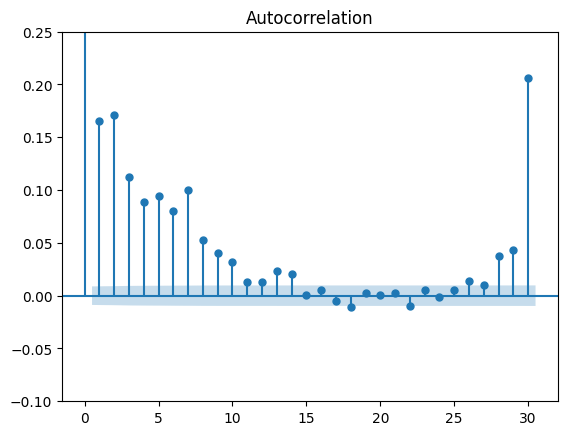

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_acf(sum_of_time, lags=30);
plt.ylim(-0.1, 0.25)

plt.show()

It can be stated that it is not a Random Walk, because the data is stationary. It is stationary since p-value is lower than 0.05, and is correlated since the lags are outside of the confidence interval.

Moreover, no abruptancy is observable in the graph, hence, it is not a moving average process.

On the other hand, the observable order is 15.

#### Stationary + Autocorrelated

In [6]:
df_sum_of_time = pd.DataFrame({'sum_of_time': sum_of_time})

#### Plotting PACF

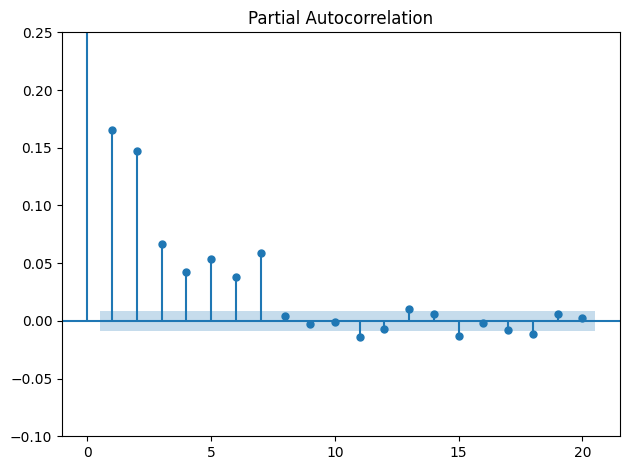

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df_sum_of_time, lags=20);
plt.ylim(-0.1, 0.25)
plt.tight_layout()

In this case the order 8 since the first lag that enters in the shaded area is the fourth lag. On the other hand, it can be seen that coefficients decrease abruptly, reducing its value from 0.5 to little less than 0. Therefore, considering this last statement it can be concluded that the time series is an autoregressive process.

### Autorregresive Process (AR)

In [15]:
train = df_sum_of_time.iloc[:40000] # Aprox 80% of the rows
test = df_sum_of_time.iloc[40000:] # Aprox 20% of the rows

print(f"Training set size: {len(train)}")  
print(f"Test set size: {len(test)}")  

Training set size: 40000
Test set size: 9740


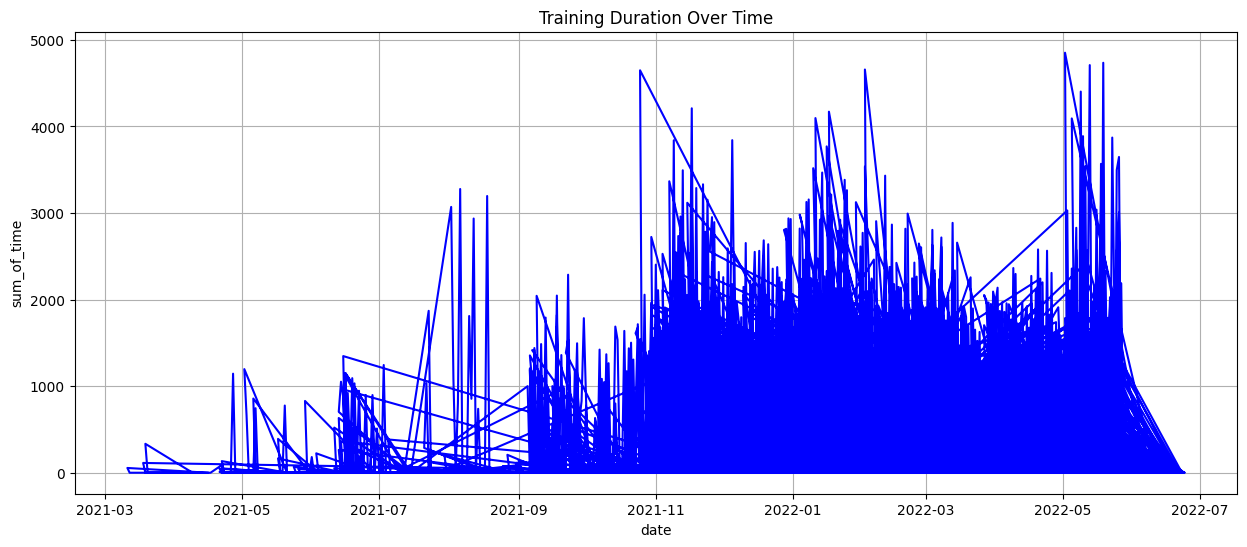

In [16]:
import matplotlib.pyplot as plt

completed_data_30days['date'] = pd.to_datetime(completed_data_30days['date'])

plt.figure(figsize=(15, 6))
plt.plot(completed_data_30days['date'], completed_data_30days['sum_of_time'], 
         label='Training Duration', color='b')
plt.xlabel('date')
plt.ylabel('sum_of_time')
plt.title('Training Duration Over Time')
plt.grid(True)
plt.show()

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    total_len = train_len + horizon
    end_idx = train_len

    if method == 'mean':
        pred_mean = []
        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))
        return pred_mean

    elif method == 'last':
        pred_last_value = []
        for i in range(train_len, total_len, window):
            last_value = df[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))
        return pred_last_value

    elif method == 'AR':
        pred_AR = []
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=(8,0,0)) # ORDER (p,q,d)--> P: autoregression model, so it is (3,0,0) / d: aún no lo hemos visto /q: moving average model, so it will be (0,0,3)
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_AR.extend(oos_pred)
        return pred_AR

In [ ]:
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 8
pred_mean = rolling_forecast(df_sum_of_time, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last_value = rolling_forecast(df_sum_of_time, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_AR = rolling_forecast(df_sum_of_time, TRAIN_LEN, HORIZON, WINDOW, 'AR')
test['pred_mean'] = pred_mean
test['pred_last_value'] = pred_last_value
test['pred_AR'] = pred_AR
test.head()

In [19]:
# Trimming predictions to match the length of the test set
pred_mean = pred_mean[:len(test)]
pred_last_value = pred_last_value[:len(test)]
pred_AR = pred_AR[:len(test)]

# Assigning to the test DataFrame
test['pred_mean'] = pred_mean
test['pred_last_value'] = pred_last_value
test['pred_AR'] = pred_AR

test.head()

,sum_of_time,pred_mean,pred_last_value,pred_AR
40000,0.0,94.039475,0.0,83.513217
40001,0.0,94.039475,0.0,145.170814
40002,0.0,94.039475,0.0,81.805494
40003,0.0,94.039475,0.0,36.562971
40004,0.0,94.039475,0.0,28.908771


In [20]:
from sklearn.metrics import mean_squared_error
mse_mean = mean_squared_error(test['sum_of_time'], test['pred_mean'])
mse_last = mean_squared_error(test['sum_of_time'], test['pred_last_value'])
mse_AR = mean_squared_error(test['sum_of_time'], test['pred_AR'])
print(mse_mean, mse_last, mse_AR)

126451.05611823653 212929.16283367557 127099.76249551369


The output I have obtained consists of three Mean Squared Error (MSE) values corresponding to the three different prediction methods you have implemented: `pred_mean`, `pred_last_value`, and `pred_AR`. Here's what these values mean:

### Understanding Mean Squared Error (MSE):

- **MSE** is a common measure used to evaluate the performance of a predictive model. It calculates the average of the squares of the differences between the observed actual values (in your case, `sum_of_time`) and the values predicted by the model.

- **Interpretation**:
  - **Lower MSE** values indicate better predictive performance since they represent smaller average squared differences between the actual and predicted values.
  - **Higher MSE** values suggest larger discrepancies between the actual and predicted values, indicating that the model is less accurate.

### Interpretation of Your Results:

- **`mse_mean = 126451.05611823653`**:
  - This is the MSE for predictions made using the mean of the past values. It indicates how well the mean-based predictions align with the actual `sum_of_time` values.

- **`mse_last = 212929.16283367557`**:
  - This is the MSE for predictions made using the last observed value as the prediction for the next period. A higher MSE compared to `mse_mean` suggests that using the last observed value is less accurate than using the mean of past values for predicting `sum_of_time`.

- **`mse_AR = 127099.76249551369`**:
  - This is the MSE for predictions made using the AR (AutoRegressive) model. The AR model uses a more sophisticated approach based on the autoregressive process to predict future values. The MSE here is slightly higher than `mse_mean`, indicating that, in this case, the AR model's predictions are not significantly better than just using the mean of past values.

### Conclusion:
- **The mean-based prediction (`mse_mean`) has the lowest MSE**, suggesting it provides the most accurate predictions among the three methods you tested.
- **The last-value prediction (`mse_last`) has the highest MSE**, indicating it is the least accurate method in this case.
- **The AR model (`mse_AR`) is close in performance to the mean-based prediction**, but slightly less accurate based on the MSE metric.

These results imply that, for your dataset and prediction task, simpler methods like using the mean might be just as effective, if not more so, than more complex models like AR. However, this can vary depending on the specific characteristics of the data, and further experimentation and model tuning might be necessary.

In [22]:
from sklearn.metrics import mean_absolute_percentage_error
mape_mean = mean_absolute_percentage_error(test['sum_of_time'], test['pred_mean']) * 100
mape_last = mean_absolute_percentage_error(test['sum_of_time'], test['pred_last_value']) * 100
mape_AR = mean_absolute_percentage_error(test['sum_of_time'], test['pred_AR']) * 100
print(mape_mean, mape_last, mape_AR)

3.8402671326588944e+19 3.066562945450089e+19 1.4951163264767949e+19


The values I have obtained from the `mean_absolute_percentage_error` (MAPE) function are extremely large, on the order of \(10^{19}\), which suggests that something might be off with your predictions or the data itself. Let's break down what this means and why you might be seeing these results.

### Understanding Mean Absolute Percentage Error (MAPE):

- **MAPE** is a metric used to measure the accuracy of a forecasting method. It expresses the accuracy as a percentage, calculated as:

  \[
  \text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{\text{Actual}_i - \text{Predicted}_i}{\text{Actual}_i} \right| \times 100
  \]

  where \( n \) is the number of data points, \( \text{Actual}_i \) is the actual value, and \( \text{Predicted}_i \) is the predicted value.

- **Interpretation**:
  - **Lower MAPE** values indicate better accuracy, with the error being a smaller percentage of the actual values.
  - A MAPE of 10% means, on average, your predictions are off by 10% from the actual values.
  - **However, MAPE can be problematic** when actual values are close to zero because the percentage error becomes very large, leading to extremely high or infinite MAPE values.

### What Do The Results Indicate?

- **`mape_mean = 3.8402671326588944e+19`**
- **`mape_last = 3.066562945450089e+19`**
- **`mape_AR = 1.4951163264767949e+19`**

These extremely large values suggest that your predictions (or some of the actual values) might be causing the MAPE to explode. Here are some possible reasons:

1. **Zero or Near-Zero Actual Values**:
   - If any of the actual values in `test['sum_of_time']` are zero or close to zero, the MAPE calculation can produce very large numbers due to division by a very small number.

2. **Extremely Large Prediction Errors**:
   - If your predictions are significantly different from the actual values, especially if some predictions are several orders of magnitude off, the MAPE could also become extremely large.

3. **Data Scaling Issues**:
   - If the data were not scaled or normalized properly, or if there are outliers or anomalies in the data, this could lead to such large MAPE values.


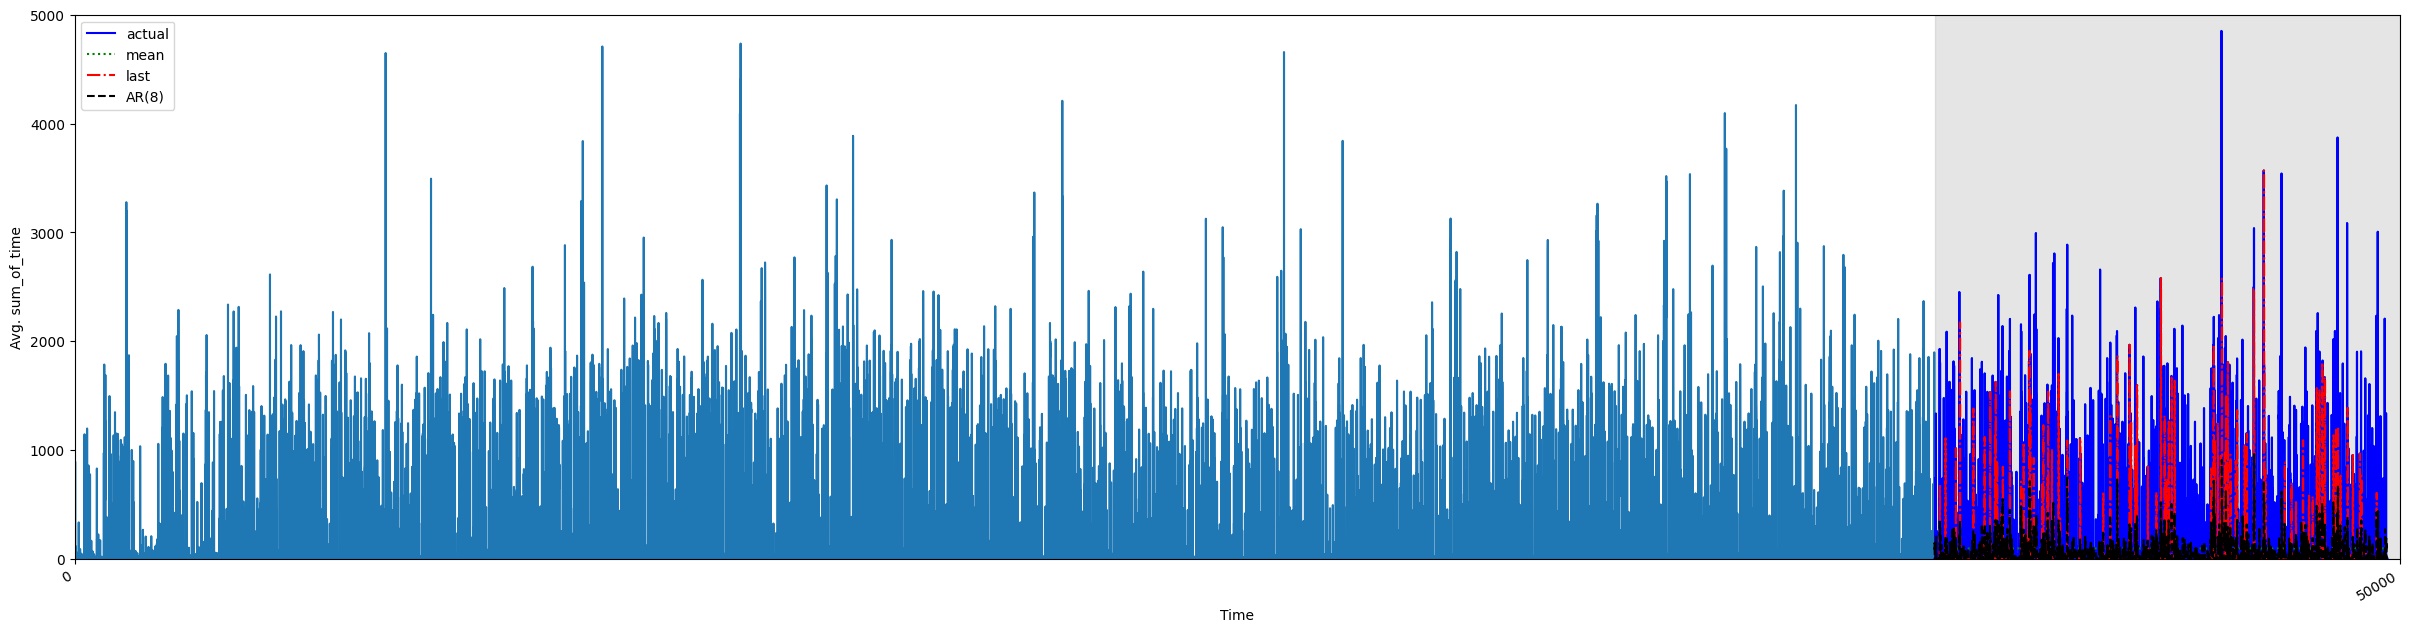

In [27]:
fig, ax = plt.subplots(figsize=(30, 8))
ax.plot(df_sum_of_time['sum_of_time'])
ax.plot(test['sum_of_time'], 'b-', label='actual')
ax.plot(test['pred_mean'], 'g:', label='mean')
ax.plot(test['pred_last_value'], 'r-.', label='last')
ax.plot(test['pred_AR'], 'k--', label='AR(8)')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Avg. sum_of_time')
ax.set_ylim(0, 5000)
ax.axvspan(40000, 50000, color='#808080', alpha=0.2)  # Actualizando los índices del axvspan
ax.set_xlim(0, 50000)  # Actualizando los límites de x-axis
plt.xticks([0, 50000])  # Actualizando las marcas en el eje x
fig.autofmt_xdate()

### Modelling an Autoregressive Moving Average (ARMA)

In [30]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

def optimize_ARMA(endog: Union[pd.Series, list], order_list: list) -> pd.DataFrame:
    results = []
    for order in tqdm_notebook(order_list):
      try:
          model = SARIMAX(endog, order=(order[0], 0, order[1]), simple_differencing=False).fit(disp=False)
      except:
        continue
      aic = model.aic
      results.append([order, aic])
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC',ascending=True).reset_index(drop=True)
    return result_df

In [40]:
from typing import Union
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

def optimize_ARMA(endog: Union[pd.Series, list], order_list: list) -> pd.DataFrame:
    results = []
    for order in order_list:
        try:
            model = SARIMAX(endog, order=(order[0], 0, order[1]), simple_differencing=False).fit(disp=False)
            aic = model.aic
            results.append([order, aic])
        except:
            continue
    
    result_df = pd.DataFrame(results, columns=['(p,q)', 'AIC'])
    # Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    return result_df

In [41]:
from itertools import product

ps = range(0, 9, 1)  # p from 0 to 8, the number 1 means the steps (one by one)
qs = range(0, 9, 1)  # the same as p
order_list = list(product(ps, qs))

result_df = optimize_ARMA(train['sum_of_time'], order_list)
result_df

,"(p,q)",AIC
0,"(4, 5)",580616.046002
1,"(5, 4)",580699.183692
2,"(6, 4)",580774.517906
3,"(3, 5)",580795.093709
4,"(3, 4)",580805.733415
5,"(4, 4)",580808.558853
6,"(8, 2)",580833.889906
7,"(4, 3)",580849.142709
8,"(7, 2)",580863.514040
9,"(3, 3)",580877.582894


#### Residual Analysis

Now, in order to analyse if the model is enough for predicting, the residual analysis has to be completed.

If the Q-Q plot shows a straight line (qualitative), and the residuals are uncorrelated the model would be ready to perform forecasts. Otherwise, new combinations of (p,q) have to be tried.

**Qualitative analysis**

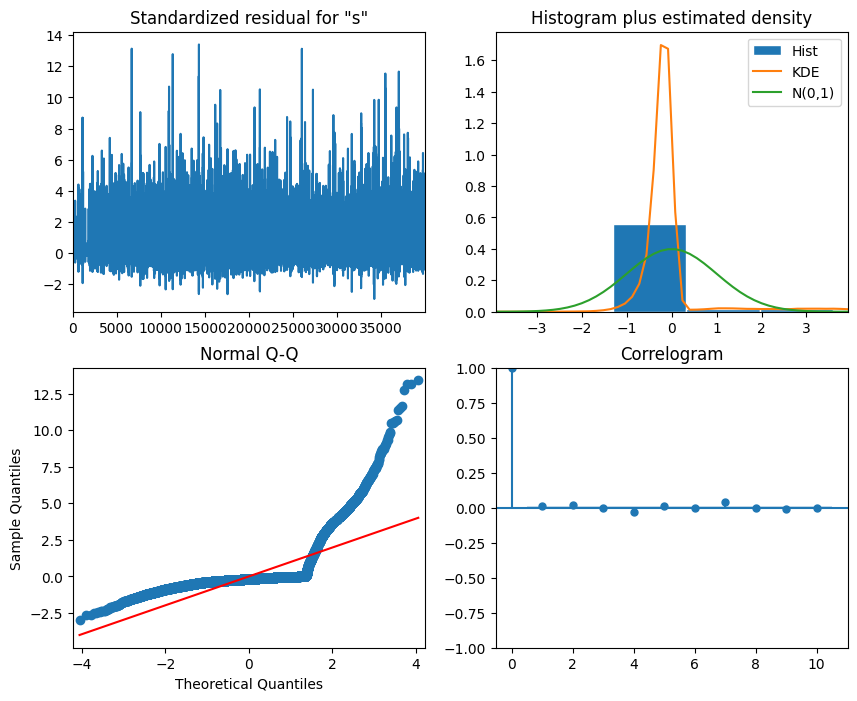

In [58]:
model = SARIMAX(train['sum_of_time'], order=(4, 0, 5),simple_differencing=False)
model_fit = model.fit(disp=False)
model_fit.plot_diagnostics(figsize=(10, 8));

It can be seen in the **`Correlogram`** graph that with different lags there is no correlation, therefore, it could suggest that residuals follow the white noise. However, no normal distribution is observable when looking at the **`Normal Q-Q`** plot, so the residuals do not act as white noise.

Even if in this previous graph the correlations are illustrated, Ljung-Box test, that is, the quantitative analysis,  is going to be conducted in order to obtain a more conclusive answer to the second question, **"Are the residual correlated?"**. In this case I are going to run on the residuals for the first 10 lags.

In [59]:
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals = model_fit.resid #This is were residuals are stored
print(acorr_ljungbox(residuals, np.arange(1, 11, 1)))

       lb_stat     lb_pvalue
1     4.661655  3.084345e-02
2    19.848183  4.898034e-05
3    20.505531  1.333420e-04
4    60.822035  1.948700e-12
5    66.961919  4.388061e-13
6    67.838803  1.133576e-12
7   127.559455  2.032511e-24
8   127.563074  9.047874e-24
9   131.037218  7.256415e-24
10  131.131105  2.745548e-23


As it can be seen, the p-values (lb_pvalue) are less than 0.05, **this suggests that there is significant evidence to reject the null hypothesis of the Ljung-Box test**. The null hypothesis assumes that the residuals are independently distributed (i.e., they behave like white noise). Since the p-values are below 0.05, this implies that the residuals **are not independently distributed and are likely correlated**.

In practical terms, this means that the residuals from the ARIMA model show signs of autocorrelation, which indicates that the model may not have fully captured the underlying patterns in the data.

#### Forecast

- Given that the qualitative analysis indicates the residuals do not behave as white noise, it suggests that the model has not fully captured all the information present in the time series. Despite this, I will proceed with the forecast to evaluate the model's performance and observe the resulting predictions.

In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    total_len = train_len + horizon
    end_idx = train_len

    if method == 'mean':
      pred_mean = []
      for i in range(train_len, total_len, window):
        mean = np.mean(df[:i].values)
        pred_mean.extend(mean for _ in range(window))
      return pred_mean

    elif method == 'last':
      pred_last_value = []
      for i in range(train_len, total_len, window):
        last_value = df[:i].iloc[-1].values[0]
        pred_last_value.extend(last_value for _ in range(window))
      return pred_last_value
    elif method == 'ARMA':
      pred_ARMA = []
      for i in range(train_len, total_len, window):
        model = SARIMAX(df[:i], order=(4,0,5))
        res = model.fit(disp=False)
        predictions = res.get_prediction(0, i + window - 1)
        oos_pred = predictions.predicted_mean.iloc[-window:]
        pred_ARMA.extend(oos_pred)
      return pred_ARMA

In [64]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from typing import Union

def optimize_arima_order(series: pd.Series, max_p: int, max_q: int, d: int = 1):
    """
    Finds the optimal (p, d, q) order for ARIMA model based on AIC.
    """
    best_aic = np.inf
    best_order = None
    for p in range(max_p + 1):
        for q in range(max_q + 1):
            try:
                model = SARIMAX(series, order=(p, d, q), enforce_stationarity=True, enforce_invertibility=True)
                res = model.fit(disp=False)
                if res.aic < best_aic:
                    best_aic = res.aic
                    best_order = (p, d, q)
            except:
                continue
    return best_order

def rolling_forecast(df: pd.Series, train_len: int, horizon: int, window: int, method: str) -> list:
    total_len = train_len + horizon

    if method == 'mean':
        pred_mean = []
        for i in range(train_len, total_len, window):
            mean = df[:i].mean()
            steps = min(window, total_len - i)
            pred_mean.extend([mean] * steps)
        return pred_mean

    elif method == 'last':
        pred_last_value = []
        for i in range(train_len, total_len, window):
            last_value = df[:i].iloc[-1]
            steps = min(window, total_len - i)
            pred_last_value.extend([last_value] * steps)
        return pred_last_value

    elif method == 'ARMA':
        pred_ARMA = []
        for i in range(train_len, total_len, window):
            train_data = df[:i]
            steps = min(window, total_len - i)
            # Optimize order
            order = optimize_arima_order(train_data, max_p=3, max_q=3, d=1)
            if order is None:
                print(f"Could not find suitable ARIMA order at step {i}. Filling with NaN.")
                pred_ARMA.extend([np.nan] * steps)
                continue
            try:
                model = SARIMAX(train_data, order=order, enforce_stationarity=True, enforce_invertibility=True)
                res = model.fit(disp=False)
                forecast = res.forecast(steps=steps)
                pred_ARMA.extend(forecast)
            except Exception as e:
                print(f"Forecasting failed at step {i} with error: {e}")
                pred_ARMA.extend([np.nan] * steps)
        return pred_ARMA
    else:
        raise ValueError(f"Unknown method '{method}'. Choose from 'mean', 'last', or 'ARMA'.")


In [ ]:
# Usage example
# Assuming df_sum_of_time, train, and test are defined appropriately
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 8

# Ensure df_sum_of_time is a pandas Series
df_series = df_sum_of_time.squeeze()

pred_mean = rolling_forecast(df_series, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last_value = rolling_forecast(df_series, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_ARMA = rolling_forecast(df_series, TRAIN_LEN, HORIZON, WINDOW, 'ARMA')

# Truncate predictions to match test length
pred_mean = pred_mean[:HORIZON]
pred_last_value = pred_last_value[:HORIZON]
pred_ARMA = pred_ARMA[:HORIZON]

# Assign predictions to test DataFrame
test = test.copy()
test['pred_mean'] = pred_mean
test['pred_last_value'] = pred_last_value
test['pred_ARMA'] = pred_ARMA

test.head()

In [ ]:
pred_df = test.copy()
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 8

pred_mean = rolling_forecast(df_sum_of_time, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last_value = rolling_forecast(df_sum_of_time, TRAIN_LEN, HORIZON, WINDOW,'last')
pred_ARMA = rolling_forecast(df_sum_of_time, TRAIN_LEN, HORIZON, WINDOW, 'ARMA')

# Print lengths to diagnose the issue
print(f"Length of pred_mean: {len(pred_mean)}")
print(f"Length of pred_last_value: {len(pred_last_value)}")
print(f"Length of pred_ARMA: {len(pred_ARMA)}")
print(f"Length of test: {len(test)}")

# Adjust prediction lengths if needed
min_len = min(len(pred_mean), len(pred_last_value), len(pred_ARMA), len(test))

# Assign to test DataFrame with adjusted lengths
test.loc[:, 'pred_mean'] = pred_mean[:min_len]
test.loc[:, 'pred_last_value'] = pred_last_value[:min_len]
test.loc[:, 'pred_ARMA'] = pred_ARMA[:min_len]
test = test.iloc[:min_len]

pred_df.head()

In [46]:
pred_df = test.copy()
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 8

pred_mean = rolling_forecast(df_sum_of_time, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last_value = rolling_forecast(df_sum_of_time, TRAIN_LEN, HORIZON, WINDOW,'last')
pred_ARMA = rolling_forecast(df_sum_of_time, TRAIN_LEN, HORIZON, WINDOW, 'ARMA')

# Print lengths to diagnose the issue
print(f"Length of pred_mean: {len(pred_mean)}")
print(f"Length of pred_last_value: {len(pred_last_value)}")
print(f"Length of pred_ARMA: {len(pred_ARMA)}")
print(f"Length of test: {len(test)}")

# Adjust prediction lengths if needed
min_len = min(len(pred_mean), len(pred_last_value), len(pred_ARMA), len(test))

# Assign to test DataFrame with adjusted lengths
test.loc[:, 'pred_mean'] = pred_mean[:min_len]
test.loc[:, 'pred_last_value'] = pred_last_value[:min_len]
test.loc[:, 'pred_ARMA'] = pred_ARMA[:min_len]
test = test.iloc[:min_len]

pred_df.head()

Exception ignored in: <function tqdm.__del__ at 0x7f691eff3b00>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/mhunters/lib/python3.12/site-packages/tqdm/std.py", line 1148, in __del__
    self.close()
  File "/home/ubuntu/anaconda3/envs/mhunters/lib/python3.12/site-packages/tqdm/notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
    ^^^^^^^^^
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x7f691eff3b00>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/mhunters/lib/python3.12/site-packages/tqdm/std.py", line 1148, in __del__
    self.close()
  File "/home/ubuntu/anaconda3/envs/mhunters/lib/python3.12/site-packages/tqdm/notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
    ^^^^^^^^^
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


Length of pred_mean: 9744
Length of pred_last_value: 9744
Length of pred_ARMA: 9744
Length of test: 9740


,sum_of_time,pred_mean,pred_last_value,pred_AR
40000,0.0,94.039475,0.0,83.513217
40001,0.0,94.039475,0.0,145.170814
40002,0.0,94.039475,0.0,81.805494
40003,0.0,94.039475,0.0,36.562971
40004,0.0,94.039475,0.0,28.908771


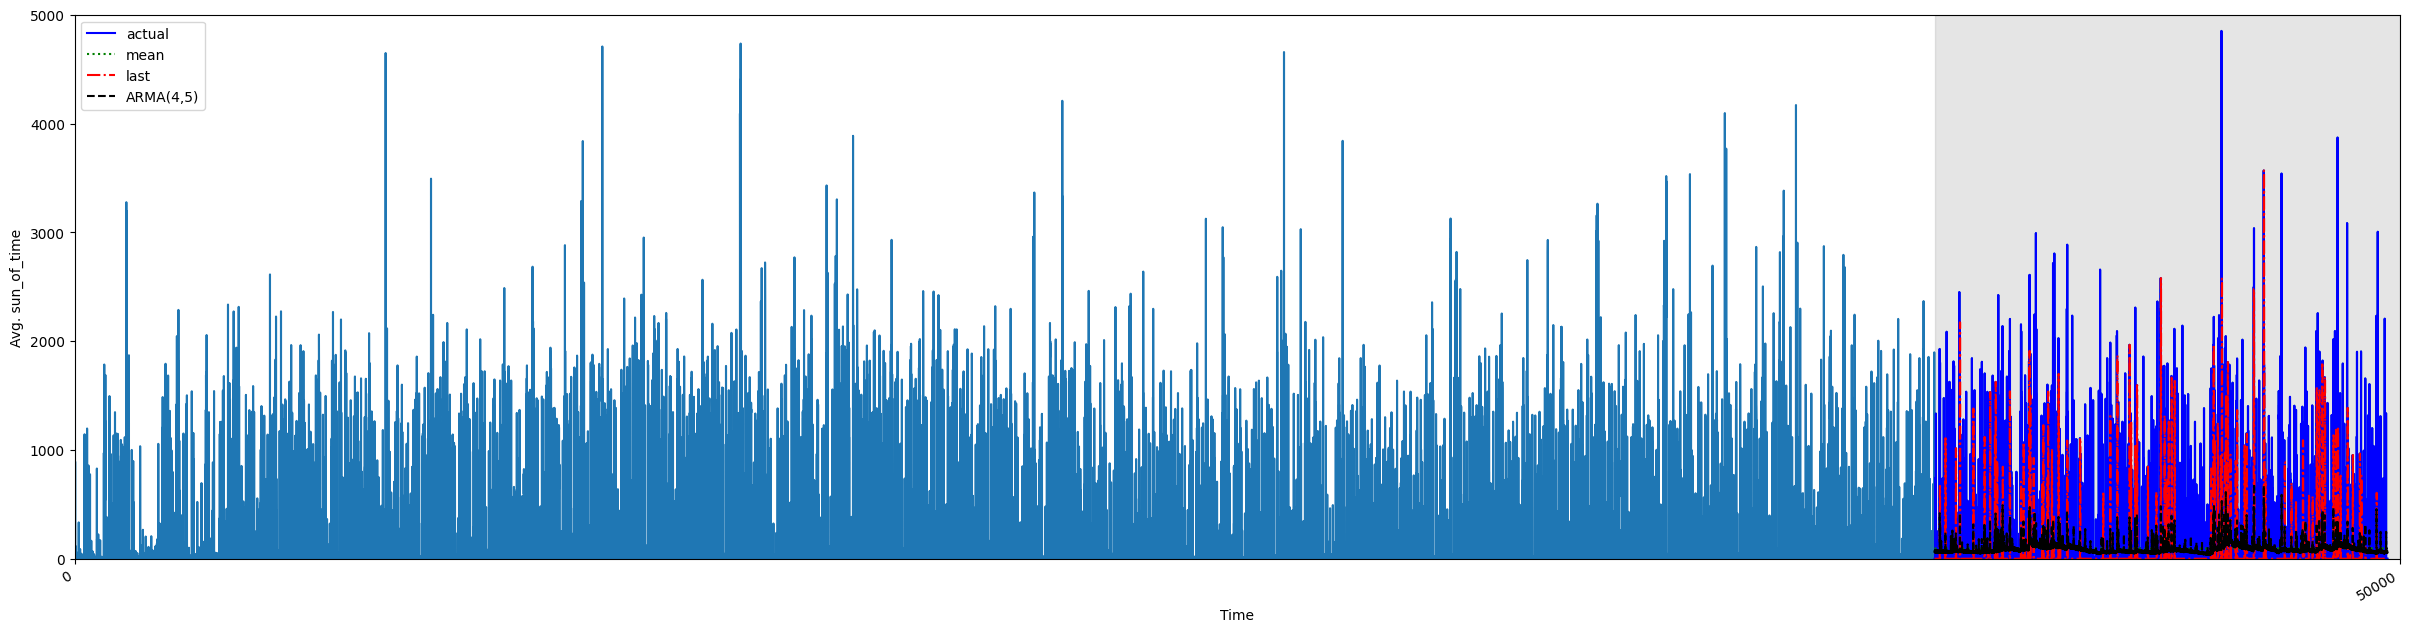

In [52]:
fig, ax = plt.subplots(figsize=(30, 8))
ax.plot(df_sum_of_time['sum_of_time'])
ax.plot(test['sum_of_time'], 'b-', label='actual')
ax.plot(test['pred_mean'], 'g:', label='mean')
ax.plot(test['pred_last_value'], 'r-.', label='last')
ax.plot(test['pred_ARMA'], 'k--', label='ARMA(4,5)')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Avg. sun_of_time')
ax.set_ylim(0, 5000)
ax.axvspan(40000, 50000, color='#808080', alpha=0.2)  # Actualizando los índices del axvspan
ax.set_xlim(0, 50000)  # Actualizando los límites de x-axis
plt.xticks([0, 50000])  # Actualizando las marcas en el eje x
fig.autofmt_xdate()

In [55]:
from sklearn.metrics import mean_squared_error
mse_mean = mean_squared_error(test['sum_of_time'], test['pred_mean'])
mse_last = mean_squared_error(test['sum_of_time'],test['pred_last_value'])
mse_ARMA = mean_squared_error(test['sum_of_time'], test['pred_ARMA'])
print(mse_mean, mse_last, mse_ARMA)

126451.05611823653 212929.16283367557 124629.28655636068


In [57]:
from sklearn.metrics import mean_absolute_percentage_error
mape_mean = mean_absolute_percentage_error(test['sum_of_time'], test['pred_mean']) * 100
mape_last = mean_absolute_percentage_error(test['sum_of_time'], test['pred_last_value']) * 100
mape_AR = mean_absolute_percentage_error(test['sum_of_time'], test['pred_ARMA']) * 100
print(mape_mean, mape_last, mape_AR)

3.8402671326588944e+19 3.066562945450089e+19 3.866258003998364e+19
